 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="#Read-data" data-toc-modified-id="Read-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read data</a></span></li><li><span><a href="#Add-PWMEnrich-info" data-toc-modified-id="Add-PWMEnrich-info-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Add PWMEnrich info</a></span></li><li><span><a href="#Add-ENCODE-TFBS" data-toc-modified-id="Add-ENCODE-TFBS-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Add ENCODE TFBS</a></span></li><li><span><a href="#Add-genomic-element-and-gene-info" data-toc-modified-id="Add-genomic-element-and-gene-info-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Add genomic element and gene info</a></span><ul class="toc-item"><li><span><a href="#Promoters" data-toc-modified-id="Promoters-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Promoters</a></span></li><li><span><a href="#Enhancers" data-toc-modified-id="Enhancers-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Enhancers</a></span><ul class="toc-item"><li><span><a href="#Intronic" data-toc-modified-id="Intronic-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Intronic</a></span></li><li><span><a href="#Intergenic" data-toc-modified-id="Intergenic-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Intergenic</a></span><ul class="toc-item"><li><span><a href="#Closest-gene" data-toc-modified-id="Closest-gene-4.2.2.1"><span class="toc-item-num">4.2.2.1&nbsp;&nbsp;</span>Closest gene</a></span></li><li><span><a href="#Hi-C" data-toc-modified-id="Hi-C-4.2.2.2"><span class="toc-item-num">4.2.2.2&nbsp;&nbsp;</span>Hi-C</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Add-POLGENOM-info" data-toc-modified-id="Add-POLGENOM-info-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Add POLGENOM info</a></span><ul class="toc-item"><li><span><a href="#Promoters" data-toc-modified-id="Promoters-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Promoters</a></span></li><li><span><a href="#Enhancers" data-toc-modified-id="Enhancers-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Enhancers</a></span></li></ul></li><li><span><a href="#Analyze-variants-with-PWMEnrich-hits" data-toc-modified-id="Analyze-variants-with-PWMEnrich-hits-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Analyze variants with PWMEnrich hits</a></span><ul class="toc-item"><li><span><a href="#Check-correlation-between-H3K27ac-in-enhancer-and-gene-expression" data-toc-modified-id="Check-correlation-between-H3K27ac-in-enhancer-and-gene-expression-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Check correlation between H3K27ac in enhancer and gene expression</a></span><ul class="toc-item"><li><span><a href="#Additional-checks-for-selected-SNPs" data-toc-modified-id="Additional-checks-for-selected-SNPs-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Additional checks for selected SNPs</a></span></li></ul></li><li><span><a href="#Check-expression-of-target-genes-in-brain-and-lymphocytes" data-toc-modified-id="Check-expression-of-target-genes-in-brain-and-lymphocytes-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Check expression of target genes in brain and lymphocytes</a></span></li><li><span><a href="#Check-expression-in-ADNI" data-toc-modified-id="Check-expression-in-ADNI-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Check expression in ADNI</a></span></li><li><span><a href="#Add-previous-manual-annotations-for-enhancer-SNPs" data-toc-modified-id="Add-previous-manual-annotations-for-enhancer-SNPs-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Add previous manual annotations for enhancer SNPs</a></span></li></ul></li></ul></div>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import pybedtools as pbt
import scipy.stats
from pyliftover import LiftOver

rsID, AF in my samples, MAF in gnomAD_NFE, genomic element, gene, PWMEnrich motif, ENCODE TFBS

# Read data

In [4]:
promoters = pd.read_csv('out_files/promoters_filtered_mean-cov3_mean-vaf02_RNAsamples.csv', 
                        sep='\t', usecols = ["CHROM", "POS", "REF", "ALT", "AC", "AF", "avsnp150", "gnomAD_genome_ALL", "gnomAD_genome_NFE", "VAFs", "num_samples_with_rna"])
promoters.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna
0,chr1,939561,G,A,"72,69;91,70",2.0,0.043,rs888928964,0.000052,0.0000,0
1,chr1,1034902,A,T,"7,3;9,8;5,6",3.0,0.065,rs751320169,0.001300,0.0017,3
2,chr1,6180416,G,A,"10,11;8,6",2.0,0.043,rs151212360,0.000300,0.0005,2
3,chr1,14924017,C,G,"6,5;12,14",2.0,0.043,rs531269337,0.001300,0.0020,0
4,chr1,21653564,C,T,"13,15;30,24",2.0,0.043,rs890141715,0.000600,0.0013,2


In [6]:
promoters_pwmenrich = pd.read_csv("out_files/promoters_PWMEnrich_full_diff1.csv", sep = '\t')
promoters_pwmenrich.head()

,motif,variant,start_position,pval_ref,pval_alt,-log10(pval_ref),-log10(pval_alt),-log10pvals_diff,-log10pvals_diff_abs,variant_short
0,CXXC1_HUMAN.H11MO.0.D,chr1:9823866G>A::chr1:9823859-9823872(+),17,0.036336,0.000036,1.439664,4.445996,3.006332,3.006332,chr1:9823866G>A
1,CXXC1_HUMAN.H11MO.0.D,chr1:148522213A>G::chr1:148522206-148522219(+),6,0.083628,0.000845,1.077647,3.072947,1.995300,1.995300,chr1:148522213A>G
2,CXXC1_HUMAN.H11MO.0.D,chr3:50359509G>A::chr3:50359502-50359515(+),17,0.064109,0.000414,1.193078,3.382624,2.189547,2.189547,chr3:50359509G>A
3,CXXC1_HUMAN.H11MO.0.D,chr7:23492567G>A::chr7:23492560-23492573(+),17,0.066363,0.000628,1.178073,3.201848,2.023775,2.023775,chr7:23492567G>A
4,CXXC1_HUMAN.H11MO.0.D,chr10:132186178G>A::chr10:132186171-132186184(+),17,0.038616,0.000173,1.413231,3.761538,2.348306,2.348306,chr10:132186178G>A


In [5]:
enhancers = pd.read_csv('out_files/enhancers_filtered_mean-cov3_mean-vaf02_RNAsamples.csv', 
                        sep='\t', usecols = ["CHROM", "POS", "REF", "ALT", "AC", "AF", "avsnp150", "gnomAD_genome_ALL", "gnomAD_genome_NFE", "VAFs", "num_samples_with_rna"])
enhancers.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna
0,chr1,2227533,C,T,"4,4;13,11",2.0,0.043,.,0.000100,0.000300,2
1,chr1,5896826,C,T,"47,38;41,32",2.0,0.043,rs373612069,0.000700,0.000700,2
2,chr1,7041938,G,A,"109,100;138,118",2.0,0.043,rs542608175,0.000032,0.000067,1
3,chr1,16912416,G,A,"189,90;160,95",2.0,0.043,.,0.000097,0.000067,0
4,chr1,16913968,T,A,"18,9;24,13;17,11",3.0,0.065,rs752881304,0.004400,0.007600,2


In [3]:
len(enhancers)

27

In [7]:
enhancers_pwmenrich = pd.read_csv("out_files/enhancers_PWMEnrich_full_diff1.csv", sep = '\t')
enhancers_pwmenrich.head()

,motif,variant,start_position,pval_ref,pval_alt,-log10(pval_ref),-log10(pval_alt),-log10pvals_diff,-log10pvals_diff_abs,variant_short
0,CXXC1_HUMAN.H11MO.0.D,chr12:69438348G>C::chr12:69438341-69438354(+),15.0,0.072016,0.000705,1.142574,3.151741,2.009167,2.009167,chr12:69438348G>C
1,CXXC1_HUMAN.H11MO.0.D,chr13:35979734A>C::chr13:35979727-35979740(+),7.0,0.007038,0.000533,2.152527,3.273652,1.121125,1.121125,chr13:35979734A>C
2,CXXC1_HUMAN.H11MO.0.D,chr15:51938615A>G::chr15:51938608-51938621(+),6.0,0.084388,0.000863,1.073722,3.063830,1.990109,1.990109,chr15:51938615A>G
3,CXXC1_HUMAN.H11MO.0.D,chrX:131753299T>A::chrX:131753292-131753305(+),19.0,0.010910,0.000970,1.962191,3.013252,1.051061,1.051061,chrX:131753299T>A
4,HMGA1_HUMAN.H11MO.0.D,chr1:94875371C>T::chr1:94875364-94875377(+),4.0,0.052682,0.000804,1.278337,3.094995,1.816659,1.816659,chr1:94875371C>T


# Add PWMEnrich info

In [8]:
def add_pwmenrich(df, pwm_hits_df):
    df["PWMEnrich motifs"] = df.apply(add_pwmenrich_column, args=(pwm_hits_df,), axis=1)  
    df["PWMEnrich best -log10pval and diff"] = df.apply(add_pwmenrich_scores, args=(pwm_hits_df,), axis=1)
    return df

def add_pwmenrich_column(row, pwm_df):
    pwm_df_dedupl = pwm_df[["motif", "variant_short"]].drop_duplicates()
    
    variant_short = row["CHROM"] + ':' + str(row["POS"]) + row["REF"] + ">" + row["ALT"]
    data_for_variant = pwm_df_dedupl[pwm_df_dedupl["variant_short"] == variant_short]
    if len(data_for_variant) > 0:
        return ", ".join(data_for_variant["motif"].values)
    
def add_pwmenrich_scores(row, pwm_df):    
    variant_short = row["CHROM"] + ':' + str(row["POS"]) + row["REF"] + ">" + row["ALT"]
    data_for_variant = pwm_df[pwm_df["variant_short"] == variant_short]
    
    if len(data_for_variant) > 0:
        best_log_pval_ref = max(data_for_variant["-log10(pval_ref)"])
        best_log_pval_alt = max(data_for_variant["-log10(pval_alt)"])
        best_log_pval_diff_abs = max(data_for_variant["-log10pvals_diff_abs"])
        return "%.2f;%.2f" % (max([best_log_pval_ref, best_log_pval_alt]), best_log_pval_diff_abs)

In [9]:
promoters_motifs = add_pwmenrich(promoters, promoters_pwmenrich)
promoters_motifs.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff
0,chr1,939561,G,A,"72,69;91,70",2.0,0.043,rs888928964,0.000052,0.0000,0,"HXA1_HUMAN.H11MO.0.C, ZKSC3_HUMAN.H11MO.0.D, E...",3.94;1.09
1,chr1,1034902,A,T,"7,3;9,8;5,6",3.0,0.065,rs751320169,0.001300,0.0017,3,"UBIP1_HUMAN.H11MO.0.D, ZN652_HUMAN.H11MO.0.D, ...",4.79;1.83
2,chr1,6180416,G,A,"10,11;8,6",2.0,0.043,rs151212360,0.000300,0.0005,2,"UBIP1_HUMAN.H11MO.0.D, SOX5_HUMAN.H11MO.0.C, R...",10.00;6.71
3,chr1,14924017,C,G,"6,5;12,14",2.0,0.043,rs531269337,0.001300,0.0020,0,"MECP2_HUMAN.H11MO.0.C, AP2B_HUMAN.H11MO.0.B, N...",5.20;2.79
4,chr1,21653564,C,T,"13,15;30,24",2.0,0.043,rs890141715,0.000600,0.0013,2,"ETV7_HUMAN.H11MO.0.D, ETV6_HUMAN.H11MO.0.D, ZN...",5.97;2.29


In [11]:
print len(promoters), len(promoters_motifs[~promoters_motifs["PWMEnrich motifs"].isnull()])

454 450


In [12]:
enhancers_motifs = add_pwmenrich(enhancers, enhancers_pwmenrich)
enhancers_motifs.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff
0,chr1,2227533,C,T,"4,4;13,11",2.0,0.043,.,0.000100,0.000300,2,"AHR_HUMAN.H11MO.0.B, E4F1_HUMAN.H11MO.0.D, CR3...",4.41;1.32
1,chr1,5896826,C,T,"47,38;41,32",2.0,0.043,rs373612069,0.000700,0.000700,2,"OVOL1_HUMAN.H11MO.0.C, HIC2_HUMAN.H11MO.0.D, N...",4.48;1.41
2,chr1,7041938,G,A,"109,100;138,118",2.0,0.043,rs542608175,0.000032,0.000067,1,"PRRX1_HUMAN.H11MO.0.D, OTX1_HUMAN.H11MO.0.D, R...",4.16;1.45
3,chr1,16912416,G,A,"189,90;160,95",2.0,0.043,.,0.000097,0.000067,0,"MAFF_HUMAN.H11MO.1.B, E2F5_HUMAN.H11MO.0.B, E2...",4.15;1.47
4,chr1,16913968,T,A,"18,9;24,13;17,11",3.0,0.065,rs752881304,0.004400,0.007600,2,"TGIF1_HUMAN.H11MO.0.A, NKX28_HUMAN.H11MO.0.C, ...",4.75;1.76


In [14]:
print len(enhancers), len(enhancers_motifs[~enhancers_motifs["PWMEnrich motifs"].isnull()])

351 344


# Add ENCODE TFBS

In [15]:
def add_encode(df):
    #TFBS from ENCODE after liftover to hg38, copied from /mnr/chr3/People/Bartek/ENCODE-TFBS-CHIP/tfs
    tfs_path = '../2019-07-03-Variants_in_ENCODE_TFBS/infiles/tfs/'    
    df["ENCODE"] = ""
    variants_df_for_bed = df.copy()
    variants_df_for_bed['POS-1'] = variants_df_for_bed['POS'] - 1
    variants_df_for_bed['strand'] = '+'
    variants_bedtool = pbt.BedTool.from_dataframe(variants_df_for_bed[['CHROM', 'POS-1', 'POS', 'strand', 'REF', 'ALT']])
    for tf_file in os.listdir(tfs_path):
        tf_name = tf_file.split('.bed')[0]
        tf_bed = pbt.BedTool(os.path.join(tfs_path, tf_file))
        intersection_bedtool = variants_bedtool.intersect(tf_bed, wa = True, wb=True) 
        
        # if any variant intersect with this tf add info to its ENCODE column
        if len(intersection_bedtool) > 0:
            intersection_df = intersection_bedtool.to_dataframe(names = ['CHROM', 'POS', 'TF_'+tf_name],
                                                                   usecols = [0,2,9])

            df = pd.merge(df, intersection_df, how = "left", on = ['CHROM', 'POS']).fillna("")   
            df["ENCODE"] = (df["ENCODE"] + ", " + df['TF_'+tf_name]).str.strip(", ")
            df = df.drop(labels = ['TF_'+tf_name], axis=1)

    return df

In [16]:
enhancers_motifs_encode = add_encode(enhancers_motifs)

In [17]:
enhancers_motifs_encode.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE
0,chr1,2227533,C,T,"4,4;13,11",2.0,0.043,.,0.000100,0.000300,2,"AHR_HUMAN.H11MO.0.B, E4F1_HUMAN.H11MO.0.D, CR3...",4.41;1.32,"NR3C1, CREB1, SAP30, BACH1, RBBP5, UBTF, MAZ, ..."
1,chr1,5896826,C,T,"47,38;41,32",2.0,0.043,rs373612069,0.000700,0.000700,2,"OVOL1_HUMAN.H11MO.0.C, HIC2_HUMAN.H11MO.0.D, N...",4.48;1.41,
2,chr1,7041938,G,A,"109,100;138,118",2.0,0.043,rs542608175,0.000032,0.000067,1,"PRRX1_HUMAN.H11MO.0.D, OTX1_HUMAN.H11MO.0.D, R...",4.16;1.45,
3,chr1,16912416,G,A,"189,90;160,95",2.0,0.043,.,0.000097,0.000067,0,"MAFF_HUMAN.H11MO.1.B, E2F5_HUMAN.H11MO.0.B, E2...",4.15;1.47,CTCF
4,chr1,16913968,T,A,"18,9;24,13;17,11",3.0,0.065,rs752881304,0.004400,0.007600,2,"TGIF1_HUMAN.H11MO.0.A, NKX28_HUMAN.H11MO.0.C, ...",4.75;1.76,"PAX5, RBBP5, MAZ, E2F6, IRF1, POLR2A, HMGN3, E..."


In [18]:
enhancers_motifs_encode[~(enhancers_motifs_encode["PWMEnrich motifs"]=="") & ~(enhancers_motifs_encode["ENCODE"]=="")]

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE
0,chr1,2227533,C,T,"4,4;13,11",2.0,0.043,.,0.000100,0.000300,2,"AHR_HUMAN.H11MO.0.B, E4F1_HUMAN.H11MO.0.D, CR3...",4.41;1.32,"NR3C1, CREB1, SAP30, BACH1, RBBP5, UBTF, MAZ, ..."
3,chr1,16912416,G,A,"189,90;160,95",2.0,0.043,.,0.000097,0.000067,0,"MAFF_HUMAN.H11MO.1.B, E2F5_HUMAN.H11MO.0.B, E2...",4.15;1.47,CTCF
4,chr1,16913968,T,A,"18,9;24,13;17,11",3.0,0.065,rs752881304,0.004400,0.007600,2,"TGIF1_HUMAN.H11MO.0.A, NKX28_HUMAN.H11MO.0.C, ...",4.75;1.76,"PAX5, RBBP5, MAZ, E2F6, IRF1, POLR2A, HMGN3, E..."
5,chr1,16913970,A,G,"18,8;24,14;15,11",3.0,0.065,rs537954556,0.004400,0.007600,2,"HMX3_HUMAN.H11MO.0.D, CTCFL_HUMAN.H11MO.0.A, C...",4.54;1.46,"PAX5, RBBP5, MAZ, E2F6, IRF1, POLR2A, HMGN3, E..."
8,chr1,21625236,G,A,"127,104;109,137",2.0,0.043,rs989937565,0.000065,0.000100,0,"NR2C1_HUMAN.H11MO.0.C, PPARD_HUMAN.H11MO.0.D, ...",4.46;1.19,"ZNF143, REST, USF1, RCOR1, EP300"
9,chr1,24705404,T,A,"81,58;84,65",2.0,0.043,rs759876216,0.000032,0.000000,0,"PBX3_HUMAN.H11MO.1.A, SOX9_HUMAN.H11MO.1.B, HX...",4.97;1.85,"EGR1, TBP, SP2, NFYA, BACH1, FOS, TEAD4, SPI1,..."
12,chr1,31811750,A,T,"78,81;17,15",2.0,0.043,rs553603564,0.001700,0.002500,1,"PAX3_HUMAN.H11MO.0.D, PAX8_HUMAN.H11MO.0.D, IR...",4.25;1.17,"RAD21, SIN3A, MAX"
15,chr1,43542202,G,A,"36,35;8,8;23,28",3.0,0.065,rs561178520,0.004200,0.007700,2,"MYF6_HUMAN.H11MO.0.C, SNAI1_HUMAN.H11MO.0.C, M...",4.09;1.96,"HNF4G, RXRA, HNF4A, ZBTB7A, SP1"
16,chr1,65692298,G,A,"40,34;94,96",2.0,0.043,rs192789815,0.000500,0.000900,1,"HXB7_HUMAN.H11MO.0.C, LHX6_HUMAN.H11MO.0.D, HX...",3.89;1.54,ZNF263
19,chr1,100189355,A,T,"9,5;43,10;5,6;42,6;9,2;33,6",6.0,0.130,.,0.000200,0.000100,4,"BARX2_HUMAN.H11MO.0.D, HXB13_HUMAN.H11MO.0.A, ...",5.21;2.61,ESR1


In [19]:
promoters_motifs_encode = add_encode(promoters_motifs)
promoters_motifs_encode.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE
0,chr1,939561,G,A,"72,69;91,70",2.0,0.043,rs888928964,0.000052,0.0000,0,"HXA1_HUMAN.H11MO.0.C, ZKSC3_HUMAN.H11MO.0.D, E...",3.94;1.09,EZH2
1,chr1,1034902,A,T,"7,3;9,8;5,6",3.0,0.065,rs751320169,0.001300,0.0017,3,"UBIP1_HUMAN.H11MO.0.D, ZN652_HUMAN.H11MO.0.D, ...",4.79;1.83,
2,chr1,6180416,G,A,"10,11;8,6",2.0,0.043,rs151212360,0.000300,0.0005,2,"UBIP1_HUMAN.H11MO.0.D, SOX5_HUMAN.H11MO.0.C, R...",10.00;6.71,"ZNF143, RAD21, EZH2, CTCF, SIN3A, BRCA1"
3,chr1,14924017,C,G,"6,5;12,14",2.0,0.043,rs531269337,0.001300,0.0020,0,"MECP2_HUMAN.H11MO.0.C, AP2B_HUMAN.H11MO.0.B, N...",5.20;2.79,"MXI1, RBBP5, BHLHE40, EZH2, MAZ, CCNT2, POLR2A..."
4,chr1,21653564,C,T,"13,15;30,24",2.0,0.043,rs890141715,0.000600,0.0013,2,"ETV7_HUMAN.H11MO.0.D, ETV6_HUMAN.H11MO.0.D, ZN...",5.97;2.29,"ZNF263, POLR2A"


In [20]:
len(promoters_motifs_encode), len(promoters_motifs)

(454, 454)

# Add genomic element and gene info

## Promoters

In [21]:
promoters_motifs_encode["genomic element"] = "promoter"

In [22]:
!head /home/magda/Symfonia/experiments/2017/2017-12-19-Collect_regions_for_panel/out_files/active_promoters_20pts_1kbup_200bpdown_not_merged.bed

chr1	28554	29754	ENST00000473358	ENSG00000243485	RP11-34P13.3	active promoter 20pts
chr1	29267	30467	ENST00000469289	ENSG00000243485	RP11-34P13.3	active promoter 20pts
chr1	29366	30566	ENST00000607096	ENSG00000274890	MIR1302-2	active promoter 20pts
chr1	29370	30570	ENST00000488147	ENSG00000227232	WASH7P	active promoter 20pts
chr1	199880	201080	ENST00000611868	ENSG00000275135	FO538757.1	active promoter 20pts
chr1	200122	201322	ENST00000624735	ENSG00000279457	FO538757.2	active promoter 20pts
chr1	777770	778970	ENST00000434264	ENSG00000237491	RP11-206L10.9	active promoter 20pts
chr1	777782	778982	ENST00000457084	ENSG00000237491	RP11-206L10.9	active promoter 20pts
chr1	777930	779130	ENST00000589899	ENSG00000237491	RP11-206L10.9	active promoter 20pts
chr1	777937	779137	ENST00000609830	ENSG00000237491	RP11-206L10.9	active promoter 20pts


In [23]:
promoters_info = pbt.BedTool("/home/magda/Symfonia/experiments/2017/2017-12-19-Collect_regions_for_panel/out_files/active_promoters_20pts_1kbup_200bpdown_not_merged.bed")
promoters_info.head()

chr1	28554	29754	ENST00000473358	ENSG00000243485	RP11-34P13.3	active promoter 20pts
 chr1	29267	30467	ENST00000469289	ENSG00000243485	RP11-34P13.3	active promoter 20pts
 chr1	29366	30566	ENST00000607096	ENSG00000274890	MIR1302-2	active promoter 20pts
 chr1	29370	30570	ENST00000488147	ENSG00000227232	WASH7P	active promoter 20pts
 chr1	199880	201080	ENST00000611868	ENSG00000275135	FO538757.1	active promoter 20pts
 chr1	200122	201322	ENST00000624735	ENSG00000279457	FO538757.2	active promoter 20pts
 chr1	777770	778970	ENST00000434264	ENSG00000237491	RP11-206L10.9	active promoter 20pts
 chr1	777782	778982	ENST00000457084	ENSG00000237491	RP11-206L10.9	active promoter 20pts
 chr1	777930	779130	ENST00000589899	ENSG00000237491	RP11-206L10.9	active promoter 20pts
 chr1	777937	779137	ENST00000609830	ENSG00000237491	RP11-206L10.9	active promoter 20pts
 

In [24]:
promoters_motifs_encode["POS-1"] = promoters_motifs_encode["POS"] - 1
promoters_motifs_encode_bedtool = pbt.BedTool.from_dataframe(promoters_motifs_encode[["CHROM", "POS-1", "POS"]])
promoters_motifs_encode_intersection = promoters_motifs_encode_bedtool.intersect(promoters_info, wa=True, wb=True)
promoters_motifs_encode_intersection_df = promoters_motifs_encode_intersection.to_dataframe(names = ["CHROM", "POS", "Gene"], usecols = [0, 2, 8]).drop_duplicates()
promoters_motifs_encode_intersection_df.head()

,CHROM,POS,Gene
0,chr1,939561,SAMD11
1,chr1,1034902,AGRN
2,chr1,6180416,CHD5
4,chr1,14924017,KAZN
5,chr1,21653564,RAP1GAP


In [25]:
len(promoters_motifs_encode_intersection_df)

533

In [26]:
len(promoters_motifs_encode_intersection_df.groupby(["CHROM", "POS"]))

454

In [27]:
def add_gene(row, intersection_df):
    genes = intersection_df[(intersection_df["CHROM"] == row["CHROM"]) & (intersection_df["POS"] == row["POS"])]["Gene"].values
    try:
        return ", ".join(genes)
    except:
        print row["CHROM"], row["POS"]
        print genes
                                                    

In [28]:
promoters_motifs_encode["Gene"] = promoters_motifs_encode.apply(add_gene, args = (promoters_motifs_encode_intersection_df,), axis=1)
promoters_motifs_encode = promoters_motifs_encode.drop(labels = ["POS-1"], axis=1)
promoters_motifs_encode[:20]

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,genomic element,Gene
0,chr1,939561,G,A,"72,69;91,70",2.0,0.043,rs888928964,0.000052,0.000000,0,"HXA1_HUMAN.H11MO.0.C, ZKSC3_HUMAN.H11MO.0.D, E...",3.94;1.09,EZH2,promoter,SAMD11
1,chr1,1034902,A,T,"7,3;9,8;5,6",3.0,0.065,rs751320169,0.001300,0.001700,3,"UBIP1_HUMAN.H11MO.0.D, ZN652_HUMAN.H11MO.0.D, ...",4.79;1.83,,promoter,AGRN
2,chr1,6180416,G,A,"10,11;8,6",2.0,0.043,rs151212360,0.000300,0.000500,2,"UBIP1_HUMAN.H11MO.0.D, SOX5_HUMAN.H11MO.0.C, R...",10.00;6.71,"ZNF143, RAD21, EZH2, CTCF, SIN3A, BRCA1",promoter,CHD5
3,chr1,14924017,C,G,"6,5;12,14",2.0,0.043,rs531269337,0.001300,0.002000,0,"MECP2_HUMAN.H11MO.0.C, AP2B_HUMAN.H11MO.0.B, N...",5.20;2.79,"MXI1, RBBP5, BHLHE40, EZH2, MAZ, CCNT2, POLR2A...",promoter,KAZN
4,chr1,21653564,C,T,"13,15;30,24",2.0,0.043,rs890141715,0.000600,0.001300,2,"ETV7_HUMAN.H11MO.0.D, ETV6_HUMAN.H11MO.0.D, ZN...",5.97;2.29,"ZNF263, POLR2A",promoter,RAP1GAP
5,chr1,25268534,A,G,"13,11;0,7;15,7",4.0,0.105,rs148017678,0.004100,0.006900,3,"FOXO4_HUMAN.H11MO.0.C, FOXP2_HUMAN.H11MO.0.C, ...",4.37;1.50,,promoter,RSRP1
6,chr1,26889274,C,T,"115,126;109,108",2.0,0.043,rs781750092,0.000200,0.000300,0,"IKZF1_HUMAN.H11MO.0.C, STA5A_HUMAN.H11MO.0.A, ...",10.00;6.89,,promoter,GPN2
7,chr1,26901253,C,T,"6,7;3,12",2.0,0.043,rs556268801,0.001100,0.001900,1,"NFIA_HUMAN.H11MO.1.D, PRRX1_HUMAN.H11MO.0.D, H...",4.79;1.91,,promoter,GPATCH3
8,chr1,27490564,C,T,"65,44;52,41",2.0,0.043,rs530994873,0.000200,0.000400,2,"NKX25_HUMAN.H11MO.0.B, E2F8_HUMAN.H11MO.0.D, R...",3.37;1.51,"USF2, TBL1XR1, REST, SRF, ATF2, MXI1, TBP, JUN...",promoter,WASF2
9,chr1,28737136,C,G,"41,33;38,43",2.0,0.043,rs199887916,0.000800,0.001400,0,"MYB_HUMAN.H11MO.0.A, NR1H4_HUMAN.H11MO.0.B",3.58;1.29,"SAP30, TBP, RBBP5, UBTF, BCLAF1, E2F6, PHF8, P...",promoter,YTHDF2


In [29]:
promoters_motifs_encode[~(promoters_motifs_encode["PWMEnrich motifs"]=="")].sort_values(by = "AC", ascending = False).head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,genomic element,Gene
159,chr8,142449370,A,C,"0,9;0,3;0,7;0,6;0,9;0,8;0,7;0,3",8.0,0.174,rs62511436,0.0011,0.0010,6,"KLF8_HUMAN.H11MO.0.C, ZIC1_HUMAN.H11MO.0.B, GL...",6.28;2.56,EZH2,promoter,ADGRB1
385,chr20,36461763,G,C,"6,6;2,1;11,4;8,2;8,1;2,2;8,7;19,2",8.0,0.250,rs955371902,0.0014,0.0017,5,"ZBT7A_HUMAN.H11MO.0.A, GLIS3_HUMAN.H11MO.0.D, ...",4.95;2.03,"EGR1, ZNF263, PHF8, POLR2A, GABPA, E2F1, TAF1",promoter,DLGAP4
147,chr7,128531249,T,C,"6,1;9,2;15,5;9,1;12,1;8,2;8,4",7.0,0.152,rs1035985757,0.0011,0.0004,4,"PATZ1_HUMAN.H11MO.1.C, ZIC1_HUMAN.H11MO.0.B, G...",5.48;2.64,"ZNF143, REST, EGR1, MXI1, TBP, ZBTB33, FOS, MA...",promoter,RP11-212P7.2
39,chr1,207495374,A,C,"7,3;6,3;1,2;8,1;0,1;6,3",7.0,0.184,.,0.0026,0.0038,4,"ZIC1_HUMAN.H11MO.0.B, SALL4_HUMAN.H11MO.0.B, E...",6.36;1.97,CTCF,promoter,CR1
369,chr19,39445098,T,A,"33,8;29,11;65,14;31,4;65,14;50,12",6.0,0.130,rs201114119,0.0054,0.0048,3,"SOX13_HUMAN.H11MO.0.D, TBP_HUMAN.H11MO.0.A, AN...",4.89;1.68,"PHF8, POLR2A, GATA2, CHD1, GATA1, SMARCB1, TCF7L2",promoter,SUPT5H


## Enhancers

### Intronic

In [32]:
!mkdir in_files

In [34]:
#copied from /mnt/chr3/People/Magda/Symfonia/brain_regulatory_regions/active_regions_outside_promoters/version_for_02.2018/H3K27ac_peaks_outside_promoters_with_gene_names.bed
!head in_files/H3K27ac_peaks_outside_promoters_with_gene_names.bed

chr1	19482	22400	ENSG00000227232
chr1	183942	184568	ENSG00000279928
chr1	189803	193125	ENSG00000279457
chr1	1024210	1025994	ENSG00000188157
chr1	1031391	1031884	ENSG00000188157
chr1	1032778	1033104	ENSG00000188157
chr1	1134548	1135587	.
chr1	1156466	1159847	.
chr1	1290755	1292028	ENSG00000162572
chr1	1427223	1428530	ENSG00000205116


In [35]:
enh_genes = pd.read_csv('in_files/H3K27ac_peaks_outside_promoters_with_gene_names.bed', 
                        sep='\t', names = ['chr', 'start', 'end', 'ID'])
enh_in_genes = enh_genes[enh_genes['ID'] != '.']
enh_in_genes[:10]

,chr,start,end,ID
0,chr1,19482,22400,ENSG00000227232
1,chr1,183942,184568,ENSG00000279928
2,chr1,189803,193125,ENSG00000279457
3,chr1,1024210,1025994,ENSG00000188157
4,chr1,1031391,1031884,ENSG00000188157
5,chr1,1032778,1033104,ENSG00000188157
8,chr1,1290755,1292028,ENSG00000162572
9,chr1,1427223,1428530,ENSG00000205116
11,chr1,1550199,1551447,ENSG00000160075
12,chr1,1567417,1568787,ENSG00000160075


In [36]:
enh_in_genes[enh_in_genes["start"] == 51582186]

,chr,start,end,ID
1176,chr1,51582186,51585240,"ENSG00000117859,ENSG00000227742"


In [37]:
#reformat to have one gene ID in cell
enh_in_gene = pd.DataFrame() 
for i, row in enh_in_genes.iterrows(): 
    genes = row['ID'].split(',') 
    if len(genes) == 1: 
        enh_in_gene = enh_in_gene.append(row, ignore_index=True) 
    else: 
        for gene in genes: 
            new_row = row 
            new_row['ID'] = gene 
            enh_in_gene = enh_in_gene.append(new_row, ignore_index=True) 
            enh_in_gene = enh_in_gene.reindex_axis(enh_in_genes.columns, axis=1) 
enh_in_gene[:10]

,chr,start,end,ID
0,chr1,19482.0,22400.0,ENSG00000227232
1,chr1,183942.0,184568.0,ENSG00000279928
2,chr1,189803.0,193125.0,ENSG00000279457
3,chr1,1024210.0,1025994.0,ENSG00000188157
4,chr1,1031391.0,1031884.0,ENSG00000188157
5,chr1,1032778.0,1033104.0,ENSG00000188157
6,chr1,1290755.0,1292028.0,ENSG00000162572
7,chr1,1427223.0,1428530.0,ENSG00000205116
8,chr1,1550199.0,1551447.0,ENSG00000160075
9,chr1,1567417.0,1568787.0,ENSG00000160075


In [38]:
enh_in_gene["start"] = enh_in_gene["start"].astype(int)
enh_in_gene["end"] = enh_in_gene["end"].astype(int)
enh_in_gene.head()

,chr,start,end,ID
0,chr1,19482,22400,ENSG00000227232
1,chr1,183942,184568,ENSG00000279928
2,chr1,189803,193125,ENSG00000279457
3,chr1,1024210,1025994,ENSG00000188157
4,chr1,1031391,1031884,ENSG00000188157


In [39]:
enh_in_gene[enh_in_gene["start"] == 51582186]

,chr,start,end,ID
905,chr1,51582186,51585240,ENSG00000117859
906,chr1,51582186,51585240,ENSG00000227742


In [40]:
!head in_files/hg38_full.genes.gtf

chr1	havana	gene	11869	14409	.	+	.	gene_id "ENSG00000223972"; gene_version "5"; gene_name "DDX11L1"; gene_source "havana"; gene_biotype "transcribed_unprocessed_pseudogene"; havana_gene "OTTHUMG00000000961"; havana_gene_version "2";
chr1	havana	gene	14404	29570	.	-	.	gene_id "ENSG00000227232"; gene_version "5"; gene_name "WASH7P"; gene_source "havana"; gene_biotype "unprocessed_pseudogene"; havana_gene "OTTHUMG00000000958"; havana_gene_version "1";
chr1	ensembl	gene	17369	17436	.	-	.	gene_id "ENSG00000278267"; gene_version "1"; gene_name "MIR6859-1"; gene_source "ensembl"; gene_biotype "miRNA";
chr1	havana	gene	29554	31109	.	+	.	gene_id "ENSG00000243485"; gene_version "3"; gene_name "RP11-34P13.3"; gene_source "havana"; gene_biotype "lincRNA"; havana_gene "OTTHUMG00000000959"; havana_gene_version "2";
chr1	ensembl	gene	30366	30503	.	+	.	gene_id "ENSG00000274890"; gene_version "1"; gene_name "MIR1302-2"; gene_source "ensembl"; gene_biotype "miRNA";
chr1	havana	gene	34554	36081	.	-	.	gen

In [41]:
#from /mnt/chr3/People/Magda/Symfonia/brain_regulatory_regions/hg38_full.genes.gtf
genes_info = pd.read_csv('in_files/hg38_full.genes.gtf', sep='\t', usecols = [0, 3, 4, 6, 8], 
                            names = ["chr", "start", "end", "strand", 'info'])
genes_info['ID'] = genes_info['info'].str.split('"').str[1]
genes_info['Gene'] = genes_info['ID'] + ":" + genes_info['info'].str.split('"').str[5]

genes_info[:20]

,chr,start,end,strand,info,ID,Gene
0,chr1,11869,14409,+,"gene_id ""ENSG00000223972""; gene_version ""5""; g...",ENSG00000223972,ENSG00000223972:DDX11L1
1,chr1,14404,29570,-,"gene_id ""ENSG00000227232""; gene_version ""5""; g...",ENSG00000227232,ENSG00000227232:WASH7P
2,chr1,17369,17436,-,"gene_id ""ENSG00000278267""; gene_version ""1""; g...",ENSG00000278267,ENSG00000278267:MIR6859-1
3,chr1,29554,31109,+,"gene_id ""ENSG00000243485""; gene_version ""3""; g...",ENSG00000243485,ENSG00000243485:RP11-34P13.3
4,chr1,30366,30503,+,"gene_id ""ENSG00000274890""; gene_version ""1""; g...",ENSG00000274890,ENSG00000274890:MIR1302-2
5,chr1,34554,36081,-,"gene_id ""ENSG00000237613""; gene_version ""2""; g...",ENSG00000237613,ENSG00000237613:FAM138A
6,chr1,52473,53312,+,"gene_id ""ENSG00000268020""; gene_version ""3""; g...",ENSG00000268020,ENSG00000268020:OR4G4P
7,chr1,62948,63887,+,"gene_id ""ENSG00000240361""; gene_version ""1""; g...",ENSG00000240361,ENSG00000240361:OR4G11P
8,chr1,69091,70008,+,"gene_id ""ENSG00000186092""; gene_version ""4""; g...",ENSG00000186092,ENSG00000186092:OR4F5
9,chr1,89295,133723,-,"gene_id ""ENSG00000238009""; gene_version ""6""; g...",ENSG00000238009,ENSG00000238009:RP11-34P13.7


In [42]:
genes_info[genes_info["Gene"].str.count(":")>1]

,chr,start,end,strand,info,ID,Gene


In [43]:
enh_in_genes_names = pd.merge(enh_in_gene, genes_info[["ID", "Gene"]], on = "ID", how = "left")
enh_in_genes_names.head()

,chr,start,end,ID,Gene
0,chr1,19482,22400,ENSG00000227232,ENSG00000227232:WASH7P
1,chr1,183942,184568,ENSG00000279928,ENSG00000279928:FO538757.3
2,chr1,189803,193125,ENSG00000279457,ENSG00000279457:FO538757.2
3,chr1,1024210,1025994,ENSG00000188157,ENSG00000188157:AGRN
4,chr1,1031391,1031884,ENSG00000188157,ENSG00000188157:AGRN


In [44]:
print len(enh_in_gene), len(enh_in_genes_names)

32713 32713


In [45]:
enhancers_motifs_encode["POS-1"] = enhancers_motifs_encode["POS"] - 1
enhancer_snps_bedtool = pbt.BedTool.from_dataframe(enhancers_motifs_encode[["CHROM", "POS-1", "POS"]])

enh_in_genes_bedtool = pbt.BedTool.from_dataframe(enh_in_genes_names)
enh_in_genes_bedtool.head()

chr1	19482	22400	ENSG00000227232	ENSG00000227232:WASH7P
 chr1	183942	184568	ENSG00000279928	ENSG00000279928:FO538757.3
 chr1	189803	193125	ENSG00000279457	ENSG00000279457:FO538757.2
 chr1	1024210	1025994	ENSG00000188157	ENSG00000188157:AGRN
 chr1	1031391	1031884	ENSG00000188157	ENSG00000188157:AGRN
 chr1	1032778	1033104	ENSG00000188157	ENSG00000188157:AGRN
 chr1	1290755	1292028	ENSG00000162572	ENSG00000162572:SCNN1D
 chr1	1427223	1428530	ENSG00000205116	ENSG00000205116:TMEM88B
 chr1	1550199	1551447	ENSG00000160075	ENSG00000160075:SSU72
 chr1	1567417	1568787	ENSG00000160075	ENSG00000160075:SSU72
 

In [46]:
enhancers_motifs_encode_intersection = enhancer_snps_bedtool.intersect(enh_in_genes_bedtool, wa=True, wb=True, loj=True)
enhancers_motifs_encode_intersection.head()

chr1	2227532	2227533	.	-1	-1	.	.
 chr1	5896825	5896826	chr1	5895777	5897516	ENSG00000131697	ENSG00000131697:NPHP4
 chr1	7041937	7041938	chr1	7040690	7043676	ENSG00000171735	ENSG00000171735:CAMTA1
 chr1	16912415	16912416	chr1	16912238	16915295	ENSG00000058453	ENSG00000058453:CROCC
 chr1	16913967	16913968	chr1	16912238	16915295	ENSG00000058453	ENSG00000058453:CROCC
 chr1	16913969	16913970	chr1	16912238	16915295	ENSG00000058453	ENSG00000058453:CROCC
 chr1	21254093	21254094	chr1	21253526	21255567	ENSG00000117298	ENSG00000117298:ECE1
 chr1	21264260	21264261	chr1	21260958	21264403	ENSG00000117298	ENSG00000117298:ECE1
 chr1	21625235	21625236	chr1	21623828	21625754	ENSG00000076864	ENSG00000076864:RAP1GAP
 chr1	24705403	24705404	.	-1	-1	.	.
 

In [47]:
#enhancers_motifs_encode_intersection_df = enhancers_motifs_encode_intersection.to_dataframe(names = ["CHROM", "POS", "Gene"], usecols = [0, 2, 7]).drop_duplicates()
enhancers_motifs_encode_intersection_df = enhancers_motifs_encode_intersection.to_dataframe(names = ["CHROM", "POS", "enh_start", "enh_end", "Gene"], usecols = [0, 2, 4,5, 7]).drop_duplicates()
enhancers_motifs_encode_intersection_df.head()

,CHROM,POS,enh_start,enh_end,Gene
0,chr1,2227533,-1,-1,.
1,chr1,5896826,5895777,5897516,ENSG00000131697:NPHP4
2,chr1,7041938,7040690,7043676,ENSG00000171735:CAMTA1
3,chr1,16912416,16912238,16915295,ENSG00000058453:CROCC
4,chr1,16913968,16912238,16915295,ENSG00000058453:CROCC


In [48]:
enhancers_motifs_encode["Gene"] = enhancers_motifs_encode.apply(add_gene, args = (enhancers_motifs_encode_intersection_df,), axis=1)
enhancers_motifs_encode = enhancers_motifs_encode.drop(labels = ["POS-1"], axis=1)
enhancers_motifs_encode[:20]

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,Gene
0,chr1,2227533,C,T,"4,4;13,11",2.0,0.043,.,0.000100,0.000300,2,"AHR_HUMAN.H11MO.0.B, E4F1_HUMAN.H11MO.0.D, CR3...",4.41;1.32,"NR3C1, CREB1, SAP30, BACH1, RBBP5, UBTF, MAZ, ...",.
1,chr1,5896826,C,T,"47,38;41,32",2.0,0.043,rs373612069,0.000700,0.000700,2,"OVOL1_HUMAN.H11MO.0.C, HIC2_HUMAN.H11MO.0.D, N...",4.48;1.41,,ENSG00000131697:NPHP4
2,chr1,7041938,G,A,"109,100;138,118",2.0,0.043,rs542608175,0.000032,0.000067,1,"PRRX1_HUMAN.H11MO.0.D, OTX1_HUMAN.H11MO.0.D, R...",4.16;1.45,,ENSG00000171735:CAMTA1
3,chr1,16912416,G,A,"189,90;160,95",2.0,0.043,.,0.000097,0.000067,0,"MAFF_HUMAN.H11MO.1.B, E2F5_HUMAN.H11MO.0.B, E2...",4.15;1.47,CTCF,ENSG00000058453:CROCC
4,chr1,16913968,T,A,"18,9;24,13;17,11",3.0,0.065,rs752881304,0.004400,0.007600,2,"TGIF1_HUMAN.H11MO.0.A, NKX28_HUMAN.H11MO.0.C, ...",4.75;1.76,"PAX5, RBBP5, MAZ, E2F6, IRF1, POLR2A, HMGN3, E...",ENSG00000058453:CROCC
5,chr1,16913970,A,G,"18,8;24,14;15,11",3.0,0.065,rs537954556,0.004400,0.007600,2,"HMX3_HUMAN.H11MO.0.D, CTCFL_HUMAN.H11MO.0.A, C...",4.54;1.46,"PAX5, RBBP5, MAZ, E2F6, IRF1, POLR2A, HMGN3, E...",ENSG00000058453:CROCC
6,chr1,21254094,A,G,"1,2;17,3",2.0,0.048,.,0.000037,0.000073,2,"PPARA_HUMAN.H11MO.1.B, SOX17_HUMAN.H11MO.0.C, ...",4.47;1.66,,ENSG00000117298:ECE1
7,chr1,21264261,A,T,"82,117;62,70",2.0,0.043,rs212534,0.001200,0.001800,1,"MAFF_HUMAN.H11MO.1.B, NR1I3_HUMAN.H11MO.0.C, N...",3.37;1.07,,ENSG00000117298:ECE1
8,chr1,21625236,G,A,"127,104;109,137",2.0,0.043,rs989937565,0.000065,0.000100,0,"NR2C1_HUMAN.H11MO.0.C, PPARD_HUMAN.H11MO.0.D, ...",4.46;1.19,"ZNF143, REST, USF1, RCOR1, EP300",ENSG00000076864:RAP1GAP
9,chr1,24705404,T,A,"81,58;84,65",2.0,0.043,rs759876216,0.000032,0.000000,0,"PBX3_HUMAN.H11MO.1.A, SOX9_HUMAN.H11MO.1.B, HX...",4.97;1.85,"EGR1, TBP, SP2, NFYA, BACH1, FOS, TEAD4, SPI1,...",.


In [49]:
len(enhancers_motifs_encode)

351

In [50]:
enhancers_motifs_encode["genomic element"] = enhancers_motifs_encode.Gene.apply(lambda x: "enhancer intergenic" if x == "." else "enhancer intronic")
enhancers_motifs_encode.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,Gene,genomic element
0,chr1,2227533,C,T,"4,4;13,11",2.0,0.043,.,0.000100,0.000300,2,"AHR_HUMAN.H11MO.0.B, E4F1_HUMAN.H11MO.0.D, CR3...",4.41;1.32,"NR3C1, CREB1, SAP30, BACH1, RBBP5, UBTF, MAZ, ...",.,enhancer intergenic
1,chr1,5896826,C,T,"47,38;41,32",2.0,0.043,rs373612069,0.000700,0.000700,2,"OVOL1_HUMAN.H11MO.0.C, HIC2_HUMAN.H11MO.0.D, N...",4.48;1.41,,ENSG00000131697:NPHP4,enhancer intronic
2,chr1,7041938,G,A,"109,100;138,118",2.0,0.043,rs542608175,0.000032,0.000067,1,"PRRX1_HUMAN.H11MO.0.D, OTX1_HUMAN.H11MO.0.D, R...",4.16;1.45,,ENSG00000171735:CAMTA1,enhancer intronic
3,chr1,16912416,G,A,"189,90;160,95",2.0,0.043,.,0.000097,0.000067,0,"MAFF_HUMAN.H11MO.1.B, E2F5_HUMAN.H11MO.0.B, E2...",4.15;1.47,CTCF,ENSG00000058453:CROCC,enhancer intronic
4,chr1,16913968,T,A,"18,9;24,13;17,11",3.0,0.065,rs752881304,0.004400,0.007600,2,"TGIF1_HUMAN.H11MO.0.A, NKX28_HUMAN.H11MO.0.C, ...",4.75;1.76,"PAX5, RBBP5, MAZ, E2F6, IRF1, POLR2A, HMGN3, E...",ENSG00000058453:CROCC,enhancer intronic


In [51]:
enhancers_motifs_encode[enhancers_motifs_encode["POS"] == 66471764]

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,Gene,genomic element
264,chr14,66471764,C,T,"16,8;8,8;10,9",3.0,0.065,rs138793190,0.0033,0.0045,3,"NF2L1_HUMAN.H11MO.0.C, DUX4_HUMAN.H11MO.0.A, D...",4.51;1.99,"TEAD4, TAL1, GATA2, EP300",ENSG00000258561:RP11-72M17.1,enhancer intronic


### Intergenic

#### Closest gene

In [52]:
genes_info.head()

,chr,start,end,strand,info,ID,Gene
0,chr1,11869,14409,+,"gene_id ""ENSG00000223972""; gene_version ""5""; g...",ENSG00000223972,ENSG00000223972:DDX11L1
1,chr1,14404,29570,-,"gene_id ""ENSG00000227232""; gene_version ""5""; g...",ENSG00000227232,ENSG00000227232:WASH7P
2,chr1,17369,17436,-,"gene_id ""ENSG00000278267""; gene_version ""1""; g...",ENSG00000278267,ENSG00000278267:MIR6859-1
3,chr1,29554,31109,+,"gene_id ""ENSG00000243485""; gene_version ""3""; g...",ENSG00000243485,ENSG00000243485:RP11-34P13.3
4,chr1,30366,30503,+,"gene_id ""ENSG00000274890""; gene_version ""1""; g...",ENSG00000274890,ENSG00000274890:MIR1302-2


In [53]:
def find_tss(row):
    if row['strand'] == '+':
        return row['start']
    else:
        return row['end']

In [54]:
genes_info["tss"] = genes_info.apply(find_tss, axis=1)
genes_info.head()

,chr,start,end,strand,info,ID,Gene,tss
0,chr1,11869,14409,+,"gene_id ""ENSG00000223972""; gene_version ""5""; g...",ENSG00000223972,ENSG00000223972:DDX11L1,11869
1,chr1,14404,29570,-,"gene_id ""ENSG00000227232""; gene_version ""5""; g...",ENSG00000227232,ENSG00000227232:WASH7P,29570
2,chr1,17369,17436,-,"gene_id ""ENSG00000278267""; gene_version ""1""; g...",ENSG00000278267,ENSG00000278267:MIR6859-1,17436
3,chr1,29554,31109,+,"gene_id ""ENSG00000243485""; gene_version ""3""; g...",ENSG00000243485,ENSG00000243485:RP11-34P13.3,29554
4,chr1,30366,30503,+,"gene_id ""ENSG00000274890""; gene_version ""1""; g...",ENSG00000274890,ENSG00000274890:MIR1302-2,30366


In [55]:
genes_info_tss_bed = pbt.BedTool.from_dataframe(genes_info[['chr', 'tss', 'tss', 'Gene']])
genes_info_tss_bed_sorted = genes_info_tss_bed.sort()
genes_info_tss_bed_sorted.head()

chr1	11869	11869	ENSG00000223972:DDX11L1
 chr1	17436	17436	ENSG00000278267:MIR6859-1
 chr1	29554	29554	ENSG00000243485:RP11-34P13.3
 chr1	29570	29570	ENSG00000227232:WASH7P
 chr1	30366	30366	ENSG00000274890:MIR1302-2
 chr1	36081	36081	ENSG00000237613:FAM138A
 chr1	52473	52473	ENSG00000268020:OR4G4P
 chr1	62948	62948	ENSG00000240361:OR4G11P
 chr1	69091	69091	ENSG00000186092:OR4F5
 chr1	91105	91105	ENSG00000239945:RP11-34P13.8
 

In [56]:
#find closest gene tss for all enhancers, report all genes for ties
enhancers_bed = pbt.BedTool.from_dataframe(enh_genes[['chr', 'start', 'end']]).sort()
tss_closest_to_enh = enhancers_bed.closest(genes_info_tss_bed_sorted, t='all', d=True)
tss_closest_to_enh.head()

chr1	19482	22400	chr1	17436	17436	ENSG00000278267:MIR6859-1	2046
 chr1	183942	184568	chr1	182393	182393	ENSG00000279928:FO538757.3	1549
 chr1	189803	193125	chr1	187958	187958	ENSG00000273874:MIR6859-2	1845
 chr1	1024210	1025994	chr1	1020123	1020123	ENSG00000188157:AGRN	4087
 chr1	1031391	1031884	chr1	1020123	1020123	ENSG00000188157:AGRN	11268
 chr1	1032778	1033104	chr1	1020123	1020123	ENSG00000188157:AGRN	12655
 chr1	1134548	1135587	chr1	1137017	1137017	ENSG00000223823:LINC01342	1430
 chr1	1156466	1159847	chr1	1167092	1167092	ENSG00000207730:MIR200B	7245
 chr1	1290755	1292028	chr1	1296170	1296170	ENSG00000278073:MIR6726	4142
 chr1	1427223	1428530	chr1	1426128	1426128	ENSG00000205116:TMEM88B	1095
 

In [57]:
len(enhancers_bed), len(tss_closest_to_enh)

(45548, 45578)

In [58]:
enhancer_snps_bedtool.head()

chr1	2227532	2227533
 chr1	5896825	5896826
 chr1	7041937	7041938
 chr1	16912415	16912416
 chr1	16913967	16913968
 chr1	16913969	16913970
 chr1	21254093	21254094
 chr1	21264260	21264261
 chr1	21625235	21625236
 chr1	24705403	24705404
 

In [59]:
len(enhancer_snps_bedtool)

351

In [60]:
enhancers_motifs_encode_closest_bedtool = enhancer_snps_bedtool.intersect(tss_closest_to_enh, wa = True, wb = True, loj=True)
enhancers_motifs_encode_closest_bedtool.head()

chr1	2227532	2227533	chr1	2227002	2227695	chr1	2228695	2228695	ENSG00000157933:SKI	1000
 chr1	5896825	5896826	chr1	5895777	5897516	chr1	5893924	5893924	ENSG00000266687:AL356261.1	1853
 chr1	7041937	7041938	chr1	7040690	7043676	chr1	7014279	7014279	ENSG00000237365:RP11-334N17.1	26411
 chr1	16912415	16912416	chr1	16912238	16915295	chr1	16904776	16904776	ENSG00000272426:RP11-108M9.6	7462
 chr1	16913967	16913968	chr1	16912238	16915295	chr1	16904776	16904776	ENSG00000272426:RP11-108M9.6	7462
 chr1	16913969	16913970	chr1	16912238	16915295	chr1	16904776	16904776	ENSG00000272426:RP11-108M9.6	7462
 chr1	21254093	21254094	chr1	21253526	21255567	chr1	21266082	21266082	ENSG00000236936:RP3-329E20.2	10515
 chr1	21264260	21264261	chr1	21260958	21264403	chr1	21266082	21266082	ENSG00000236936:RP3-329E20.2	1679
 chr1	21625235	21625236	chr1	21623828	21625754	chr1	21592548	21592548	ENSG00000221781:AL359815.1	31280
 chr1	24705403	24705404	chr1	24704096	24706797	chr1	24745357	24745357	ENSG00000169504:CLIC4	

In [61]:
# change enhancers_motifs_encode_closest_bedtool to df and merge with enhancers_motifs_encode
enhancers_closest = enhancers_motifs_encode_closest_bedtool.to_dataframe(names = ["CHROM", "POS", "start", "end", "Closest gene", "dist. to closest gene"], usecols = [0,2,4,5,9,10])
enhancers_closest.head()

,CHROM,POS,start,end,Closest gene,dist. to closest gene
0,chr1,2227533,2227002,2227695,ENSG00000157933:SKI,1000
1,chr1,5896826,5895777,5897516,ENSG00000266687:AL356261.1,1853
2,chr1,7041938,7040690,7043676,ENSG00000237365:RP11-334N17.1,26411
3,chr1,16912416,16912238,16915295,ENSG00000272426:RP11-108M9.6,7462
4,chr1,16913968,16912238,16915295,ENSG00000272426:RP11-108M9.6,7462


In [62]:
print len(enhancer_snps_bedtool), len(enhancers_closest)

351 351


The number of records has not changed - for enhancers with SNPs always only one gene per enhancer was found.

In [63]:
enhancers_motifs_encode_closest = pd.merge(enhancers_motifs_encode, enhancers_closest[["CHROM", "POS", "Closest gene", "dist. to closest gene"]],
                                          on = ["CHROM", "POS"], how = "outer")

enhancers_motifs_encode_closest.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,Gene,genomic element,Closest gene,dist. to closest gene
0,chr1,2227533,C,T,"4,4;13,11",2.0,0.043,.,0.000100,0.000300,2,"AHR_HUMAN.H11MO.0.B, E4F1_HUMAN.H11MO.0.D, CR3...",4.41;1.32,"NR3C1, CREB1, SAP30, BACH1, RBBP5, UBTF, MAZ, ...",.,enhancer intergenic,ENSG00000157933:SKI,1000
1,chr1,5896826,C,T,"47,38;41,32",2.0,0.043,rs373612069,0.000700,0.000700,2,"OVOL1_HUMAN.H11MO.0.C, HIC2_HUMAN.H11MO.0.D, N...",4.48;1.41,,ENSG00000131697:NPHP4,enhancer intronic,ENSG00000266687:AL356261.1,1853
2,chr1,7041938,G,A,"109,100;138,118",2.0,0.043,rs542608175,0.000032,0.000067,1,"PRRX1_HUMAN.H11MO.0.D, OTX1_HUMAN.H11MO.0.D, R...",4.16;1.45,,ENSG00000171735:CAMTA1,enhancer intronic,ENSG00000237365:RP11-334N17.1,26411
3,chr1,16912416,G,A,"189,90;160,95",2.0,0.043,.,0.000097,0.000067,0,"MAFF_HUMAN.H11MO.1.B, E2F5_HUMAN.H11MO.0.B, E2...",4.15;1.47,CTCF,ENSG00000058453:CROCC,enhancer intronic,ENSG00000272426:RP11-108M9.6,7462
4,chr1,16913968,T,A,"18,9;24,13;17,11",3.0,0.065,rs752881304,0.004400,0.007600,2,"TGIF1_HUMAN.H11MO.0.A, NKX28_HUMAN.H11MO.0.C, ...",4.75;1.76,"PAX5, RBBP5, MAZ, E2F6, IRF1, POLR2A, HMGN3, E...",ENSG00000058453:CROCC,enhancer intronic,ENSG00000272426:RP11-108M9.6,7462


In [64]:
len(enhancers_motifs_encode), len(enhancers_motifs_encode_closest)

(351, 351)

In [65]:
enhancers_motifs_encode_closest["genomic element"].value_counts()

enhancer intronic      224
enhancer intergenic    127
Name: genomic element, dtype: int64

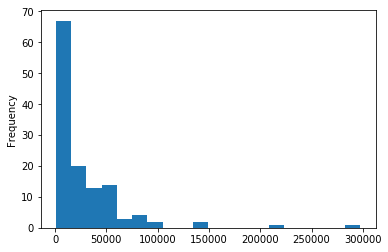

In [66]:
intergenic = enhancers_motifs_encode_closest[enhancers_motifs_encode_closest["genomic element"] == "enhancer intergenic"]

intergenic["dist. to closest gene"].plot.hist(bins = 20)

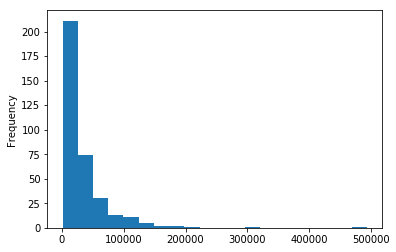

In [67]:
enhancers_motifs_encode_closest["dist. to closest gene"].plot.hist(bins = 20)

There is an intronic enhancer with ~500kb to closest gene!

In [68]:
enhancers_motifs_encode_closest.sort_values(by = "dist. to closest gene", ascending=False)[:20]

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,Gene,genomic element,Closest gene,dist. to closest gene
149,chr7,70093290,G,A,"19,14;67,66",2.0,0.043,rs569183497,0.000700,0.001300,2,"MYF6_HUMAN.H11MO.0.C, ASCL2_HUMAN.H11MO.0.D, O...",10.00;7.40,EP300,ENSG00000158321:AUTS2,enhancer intronic,ENSG00000158321:AUTS2,493419
130,chr6,90885089,C,G,"13,26;21,19",2.0,0.043,rs747544862,0.000300,0.000600,1,"KLF4_HUMAN.H11MO.0.A, GLI3_HUMAN.H11MO.0.B",3.49;1.12,,.,enhancer intergenic,ENSG00000135341:MAP3K7,297631
129,chr6,82710722,T,G,"32,23;26,30",2.0,0.043,rs186524540,0.001300,0.002100,2,"MSX2_HUMAN.H11MO.0.D, NF2L1_HUMAN.H11MO.0.C, H...",4.15;1.58,,.,enhancer intergenic,ENSG00000220091:LAP3P1,212088
176,chr9,77848708,T,C,"83,73;40,36;87,72",3.0,0.065,rs182563279,0.001300,0.002300,3,"NFYB_HUMAN.H11MO.0.A, RUNX2_HUMAN.H11MO.0.A",4.34;1.14,,ENSG00000156052:GNAQ,enhancer intronic,ENSG00000156052:GNAQ,181239
227,chr12,11828474,G,A,"22,25;47,35;121,106",3.0,0.065,rs140107009,0.004900,0.008000,2,"KAISO_HUMAN.H11MO.1.A, SRBP1_HUMAN.H11MO.0.A, ...",3.72;1.60,,ENSG00000139083:ETV6,enhancer intronic,ENSG00000139083:ETV6,176520
109,chr5,107973351,G,T,"6,2;7,2;12,6;9,3;20,9",5.0,0.114,rs963187462,0.001500,0.002200,2,"SRY_HUMAN.H11MO.0.B, BARX2_HUMAN.H11MO.0.D, IR...",5.37;2.25,,ENSG00000145743:FBXL17,enhancer intronic,ENSG00000251732:RN7SKP122,160828
250,chr13,35979734,A,C,"28,24;18,13",2.0,0.043,rs777315289,0.001600,0.001500,1,"CXXC1_HUMAN.H11MO.0.D, GMEB2_HUMAN.H11MO.0.D, ...",3.82;1.54,"JUN, FOS, MYC",ENSG00000133083:DCLK1,enhancer intronic,ENSG00000133083:DCLK1,150095
249,chr13,35842056,C,T,"40,21;32,41;22,8",3.0,0.065,rs181047757,0.004000,0.006400,2,"NFAC3_HUMAN.H11MO.0.B, STAT4_HUMAN.H11MO.0.A, ...",4.44;1.43,REST,ENSG00000133083:DCLK1,enhancer intronic,ENSG00000236036:LINC00445,141923
248,chr13,35841849,C,T,"61,55;44,28",2.0,0.043,rs142256254,0.000700,0.001200,1,"DPRX_HUMAN.H11MO.0.D, BHE23_HUMAN.H11MO.0.D",3.30;1.55,REST,ENSG00000133083:DCLK1,enhancer intronic,ENSG00000236036:LINC00445,141923
95,chr5,15795255,G,C,"42,51;108,76;53,56",3.0,0.065,rs576805372,0.003500,0.005700,1,"E4F1_HUMAN.H11MO.0.D, GMEB2_HUMAN.H11MO.0.D, H...",4.82;1.42,,ENSG00000183580:FBXL7,enhancer intronic,ENSG00000216077:MIR887,139082


##### Protein coding genes only

In [69]:
genes_info["info"].loc[0]

'gene_id "ENSG00000223972"; gene_version "5"; gene_name "DDX11L1"; gene_source "havana"; gene_biotype "transcribed_unprocessed_pseudogene"; havana_gene "OTTHUMG00000000961"; havana_gene_version "2";'

In [70]:
genes_info["gene_biotype"] = genes_info["info"].str.split('"').str[9]
genes_info[:10]

,chr,start,end,strand,info,ID,Gene,tss,gene_biotype
0,chr1,11869,14409,+,"gene_id ""ENSG00000223972""; gene_version ""5""; g...",ENSG00000223972,ENSG00000223972:DDX11L1,11869,transcribed_unprocessed_pseudogene
1,chr1,14404,29570,-,"gene_id ""ENSG00000227232""; gene_version ""5""; g...",ENSG00000227232,ENSG00000227232:WASH7P,29570,unprocessed_pseudogene
2,chr1,17369,17436,-,"gene_id ""ENSG00000278267""; gene_version ""1""; g...",ENSG00000278267,ENSG00000278267:MIR6859-1,17436,miRNA
3,chr1,29554,31109,+,"gene_id ""ENSG00000243485""; gene_version ""3""; g...",ENSG00000243485,ENSG00000243485:RP11-34P13.3,29554,lincRNA
4,chr1,30366,30503,+,"gene_id ""ENSG00000274890""; gene_version ""1""; g...",ENSG00000274890,ENSG00000274890:MIR1302-2,30366,miRNA
5,chr1,34554,36081,-,"gene_id ""ENSG00000237613""; gene_version ""2""; g...",ENSG00000237613,ENSG00000237613:FAM138A,36081,lincRNA
6,chr1,52473,53312,+,"gene_id ""ENSG00000268020""; gene_version ""3""; g...",ENSG00000268020,ENSG00000268020:OR4G4P,52473,unprocessed_pseudogene
7,chr1,62948,63887,+,"gene_id ""ENSG00000240361""; gene_version ""1""; g...",ENSG00000240361,ENSG00000240361:OR4G11P,62948,unprocessed_pseudogene
8,chr1,69091,70008,+,"gene_id ""ENSG00000186092""; gene_version ""4""; g...",ENSG00000186092,ENSG00000186092:OR4F5,69091,protein_coding
9,chr1,89295,133723,-,"gene_id ""ENSG00000238009""; gene_version ""6""; g...",ENSG00000238009,ENSG00000238009:RP11-34P13.7,133723,lincRNA


In [71]:
protein_coding_genes = genes_info[genes_info["gene_biotype"] == "protein_coding"]
protein_coding_genes_info_tss_bed = pbt.BedTool.from_dataframe(protein_coding_genes[['chr', 'tss', 'tss', 'Gene']])
protein_coding_genes_info_tss_bed_sorted = protein_coding_genes_info_tss_bed.sort()

#find closest gene tss for all enhancers, report all genes for ties
protein_coding_tss_closest_to_enh = enhancers_bed.closest(protein_coding_genes_info_tss_bed_sorted, t='all', d=True)
enhancers_motifs_encode_closest_protein_coding_bedtool = enhancer_snps_bedtool.intersect(protein_coding_tss_closest_to_enh, wa = True, wb = True, loj=True)
enhancers_motifs_encode_closest_protein_coding_bedtool.head()

chr1	2227532	2227533	chr1	2227002	2227695	chr1	2228695	2228695	ENSG00000157933:SKI	1000
 chr1	5896825	5896826	chr1	5895777	5897516	chr1	5991466	5991466	ENSG00000069424:KCNAB2	93950
 chr1	7041937	7041938	chr1	7040690	7043676	chr1	6785324	6785324	ENSG00000171735:CAMTA1	255366
 chr1	16912415	16912416	chr1	16912238	16915295	chr1	16980835	16980835	ENSG00000117122:MFAP2	65540
 chr1	16913967	16913968	chr1	16912238	16915295	chr1	16980835	16980835	ENSG00000117122:MFAP2	65540
 chr1	16913969	16913970	chr1	16912238	16915295	chr1	16980835	16980835	ENSG00000117122:MFAP2	65540
 chr1	21254093	21254094	chr1	21253526	21255567	chr1	21176888	21176888	ENSG00000075151:EIF4G3	76638
 chr1	21264260	21264261	chr1	21260958	21264403	chr1	21345504	21345504	ENSG00000117298:ECE1	81101
 chr1	21625235	21625236	chr1	21623828	21625754	chr1	21669363	21669363	ENSG00000076864:RAP1GAP	43609
 chr1	24705403	24705404	chr1	24704096	24706797	chr1	24745357	24745357	ENSG00000169504:CLIC4	38560
 

In [72]:
# change enhancers_motifs_encode_closest_protein_coding_bedtool to df and merge with enhancers_motifs_encode
enhancers_closest_protein_coding = enhancers_motifs_encode_closest_protein_coding_bedtool.to_dataframe(names = ["CHROM", "POS", "start", "end", "Closest protein gene", "dist. to closest protein gene"], usecols = [0,2,4,5,9,10])
enhancers_closest_protein_coding.head()

,CHROM,POS,start,end,Closest protein gene,dist. to closest protein gene
0,chr1,2227533,2227002,2227695,ENSG00000157933:SKI,1000
1,chr1,5896826,5895777,5897516,ENSG00000069424:KCNAB2,93950
2,chr1,7041938,7040690,7043676,ENSG00000171735:CAMTA1,255366
3,chr1,16912416,16912238,16915295,ENSG00000117122:MFAP2,65540
4,chr1,16913968,16912238,16915295,ENSG00000117122:MFAP2,65540


In [73]:
enhancers_motifs_encode_closest = pd.merge(enhancers_motifs_encode_closest, enhancers_closest_protein_coding[["CHROM", "POS", "Closest protein gene", "dist. to closest protein gene"]],
                                          on = ["CHROM", "POS"], how = "outer")

enhancers_motifs_encode_closest.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,Gene,genomic element,Closest gene,dist. to closest gene,Closest protein gene,dist. to closest protein gene
0,chr1,2227533,C,T,"4,4;13,11",2.0,0.043,.,0.000100,0.000300,2,"AHR_HUMAN.H11MO.0.B, E4F1_HUMAN.H11MO.0.D, CR3...",4.41;1.32,"NR3C1, CREB1, SAP30, BACH1, RBBP5, UBTF, MAZ, ...",.,enhancer intergenic,ENSG00000157933:SKI,1000,ENSG00000157933:SKI,1000
1,chr1,5896826,C,T,"47,38;41,32",2.0,0.043,rs373612069,0.000700,0.000700,2,"OVOL1_HUMAN.H11MO.0.C, HIC2_HUMAN.H11MO.0.D, N...",4.48;1.41,,ENSG00000131697:NPHP4,enhancer intronic,ENSG00000266687:AL356261.1,1853,ENSG00000069424:KCNAB2,93950
2,chr1,7041938,G,A,"109,100;138,118",2.0,0.043,rs542608175,0.000032,0.000067,1,"PRRX1_HUMAN.H11MO.0.D, OTX1_HUMAN.H11MO.0.D, R...",4.16;1.45,,ENSG00000171735:CAMTA1,enhancer intronic,ENSG00000237365:RP11-334N17.1,26411,ENSG00000171735:CAMTA1,255366
3,chr1,16912416,G,A,"189,90;160,95",2.0,0.043,.,0.000097,0.000067,0,"MAFF_HUMAN.H11MO.1.B, E2F5_HUMAN.H11MO.0.B, E2...",4.15;1.47,CTCF,ENSG00000058453:CROCC,enhancer intronic,ENSG00000272426:RP11-108M9.6,7462,ENSG00000117122:MFAP2,65540
4,chr1,16913968,T,A,"18,9;24,13;17,11",3.0,0.065,rs752881304,0.004400,0.007600,2,"TGIF1_HUMAN.H11MO.0.A, NKX28_HUMAN.H11MO.0.C, ...",4.75;1.76,"PAX5, RBBP5, MAZ, E2F6, IRF1, POLR2A, HMGN3, E...",ENSG00000058453:CROCC,enhancer intronic,ENSG00000272426:RP11-108M9.6,7462,ENSG00000117122:MFAP2,65540


#### Hi-C

In [74]:
# Contacts
contacts = pd.read_csv('/mnt/chr7/data/hansiu/Magdowe/luty2018/E-enhancers_1_hg19-P-TSSs_hg19-all-rem.bed', 
                       sep=' ')
contacts_to_genes = contacts[contacts["ENSG"] != '-']
contacts_to_genes.head()

,chr,start,end,ENST,ENSG,-log10(qval),confirmed_both_ways
1,chr1,1024210,1025994,ENST00000606034,ENSG00000272512,8.697366,1
2,chr1,1024210,1025994,ENST00000484667,ENSG00000188290,8.697366,1
3,chr1,1024210,1025994,ENST00000481869,ENSG00000188290,8.697366,1
4,chr1,1024210,1025994,ENST00000304952,ENSG00000188290,8.697366,1
5,chr1,1024210,1025994,ENST00000428771,ENSG00000188290,8.697366,1


In [75]:
contacts_bedtool = pbt.BedTool.from_dataframe(contacts_to_genes[["chr", "start", "end", "ENSG"]].drop_duplicates())
contacts_bedtool.head()

chr1	1024210	1025994	ENSG00000272512
 chr1	1024210	1025994	ENSG00000188290
 chr1	1024210	1025994	ENSG00000187608
 chr1	1024210	1025994	ENSG00000184163
 chr1	1024210	1025994	ENSG00000131584
 chr1	1024210	1025994	ENSG00000169972
 chr1	1024210	1025994	ENSG00000127054
 chr1	1024210	1025994	ENSG00000224051
 chr1	1024210	1025994	ENSG00000162576
 chr1	1024210	1025994	ENSG00000175756
 

In [76]:
#intersect variants with contacts
enhancer_snps_contacts_bedtool = enhancer_snps_bedtool.intersect(contacts_bedtool, wa=True, wb=True, loj=True)
enhancer_snps_contacts_bedtool.head()

chr1	2227532	2227533	chr1	2227002	2227695	ENSG00000157933
 chr1	2227532	2227533	chr1	2227002	2227695	ENSG00000116151
 chr1	2227532	2227533	chr1	2227002	2227695	ENSG00000157916
 chr1	5896825	5896826	.	-1	-1	.
 chr1	7041937	7041938	.	-1	-1	.
 chr1	16912415	16912416	chr1	16912238	16915295	ENSG00000206652
 chr1	16913967	16913968	chr1	16912238	16915295	ENSG00000206652
 chr1	16913969	16913970	chr1	16912238	16915295	ENSG00000206652
 chr1	21254093	21254094	chr1	21253526	21255567	ENSG00000076864
 chr1	21264260	21264261	chr1	21260958	21264403	ENSG00000076864
 

In [77]:
enhancer_snps_contacts_df = enhancer_snps_contacts_bedtool.to_dataframe(usecols = [0,2,6], names = ["CHROM", "POS", "ID"])
enhancer_snps_contacts_df.head()

,CHROM,POS,ID
0,chr1,2227533,ENSG00000157933
1,chr1,2227533,ENSG00000116151
2,chr1,2227533,ENSG00000157916
3,chr1,5896826,.
4,chr1,7041938,.


In [78]:
genes_info.head()

,chr,start,end,strand,info,ID,Gene,tss,gene_biotype
0,chr1,11869,14409,+,"gene_id ""ENSG00000223972""; gene_version ""5""; g...",ENSG00000223972,ENSG00000223972:DDX11L1,11869,transcribed_unprocessed_pseudogene
1,chr1,14404,29570,-,"gene_id ""ENSG00000227232""; gene_version ""5""; g...",ENSG00000227232,ENSG00000227232:WASH7P,29570,unprocessed_pseudogene
2,chr1,17369,17436,-,"gene_id ""ENSG00000278267""; gene_version ""1""; g...",ENSG00000278267,ENSG00000278267:MIR6859-1,17436,miRNA
3,chr1,29554,31109,+,"gene_id ""ENSG00000243485""; gene_version ""3""; g...",ENSG00000243485,ENSG00000243485:RP11-34P13.3,29554,lincRNA
4,chr1,30366,30503,+,"gene_id ""ENSG00000274890""; gene_version ""1""; g...",ENSG00000274890,ENSG00000274890:MIR1302-2,30366,miRNA


In [79]:
enhancer_snps_contacts_gene_df = pd.merge(enhancer_snps_contacts_df, genes_info, on = 'ID', how = "left").fillna('.')
enhancer_snps_contacts_gene_df.head()

,CHROM,POS,ID,chr,start,end,strand,info,Gene,tss,gene_biotype
0,chr1,2227533,ENSG00000157933,chr1,2.2287e+06,2.31012e+06,+,"gene_id ""ENSG00000157933""; gene_version ""9""; g...",ENSG00000157933:SKI,2.2287e+06,protein_coding
1,chr1,2227533,ENSG00000116151,chr1,2.32125e+06,2.39171e+06,-,"gene_id ""ENSG00000116151""; gene_version ""13""; ...",ENSG00000116151:MORN1,2.39171e+06,protein_coding
2,chr1,2227533,ENSG00000157916,chr1,2.39178e+06,2.40544e+06,+,"gene_id ""ENSG00000157916""; gene_version ""18""; ...",ENSG00000157916:RER1,2.39178e+06,protein_coding
3,chr1,5896826,.,.,.,.,.,.,.,.,.
4,chr1,7041938,.,.,.,.,.,.,.,.,.


In [80]:
enhancer_snps_contacts_gene_df[enhancer_snps_contacts_gene_df["POS"]==150419419]

,CHROM,POS,ID,chr,start,end,strand,info,Gene,tss,gene_biotype
277,chr6,150419419,ENSG00000120278,chr6,1.506e+08,1.50844e+08,+,"gene_id ""ENSG00000120278""; gene_version ""14""; ...",ENSG00000120278:PLEKHG1,1.506e+08,protein_coding
278,chr6,150419419,ENSG00000120254,chr6,1.50866e+08,1.51102e+08,+,"gene_id ""ENSG00000120254""; gene_version ""15""; ...",ENSG00000120254:MTHFD1L,1.50866e+08,protein_coding


In [81]:
enhancers_motifs_encode_closest["Contacting gene"] = enhancers_motifs_encode_closest.apply(add_gene, args=(enhancer_snps_contacts_gene_df, ), axis=1)
enhancers_motifs_encode_closest.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,...,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,Gene,genomic element,Closest gene,dist. to closest gene,Closest protein gene,dist. to closest protein gene,Contacting gene
0,chr1,2227533,C,T,"4,4;13,11",2.0,0.043,.,0.000100,0.000300,...,"AHR_HUMAN.H11MO.0.B, E4F1_HUMAN.H11MO.0.D, CR3...",4.41;1.32,"NR3C1, CREB1, SAP30, BACH1, RBBP5, UBTF, MAZ, ...",.,enhancer intergenic,ENSG00000157933:SKI,1000,ENSG00000157933:SKI,1000,"ENSG00000157933:SKI, ENSG00000116151:MORN1, EN..."
1,chr1,5896826,C,T,"47,38;41,32",2.0,0.043,rs373612069,0.000700,0.000700,...,"OVOL1_HUMAN.H11MO.0.C, HIC2_HUMAN.H11MO.0.D, N...",4.48;1.41,,ENSG00000131697:NPHP4,enhancer intronic,ENSG00000266687:AL356261.1,1853,ENSG00000069424:KCNAB2,93950,.
2,chr1,7041938,G,A,"109,100;138,118",2.0,0.043,rs542608175,0.000032,0.000067,...,"PRRX1_HUMAN.H11MO.0.D, OTX1_HUMAN.H11MO.0.D, R...",4.16;1.45,,ENSG00000171735:CAMTA1,enhancer intronic,ENSG00000237365:RP11-334N17.1,26411,ENSG00000171735:CAMTA1,255366,.
3,chr1,16912416,G,A,"189,90;160,95",2.0,0.043,.,0.000097,0.000067,...,"MAFF_HUMAN.H11MO.1.B, E2F5_HUMAN.H11MO.0.B, E2...",4.15;1.47,CTCF,ENSG00000058453:CROCC,enhancer intronic,ENSG00000272426:RP11-108M9.6,7462,ENSG00000117122:MFAP2,65540,ENSG00000206652:RNU1-1
4,chr1,16913968,T,A,"18,9;24,13;17,11",3.0,0.065,rs752881304,0.004400,0.007600,...,"TGIF1_HUMAN.H11MO.0.A, NKX28_HUMAN.H11MO.0.C, ...",4.75;1.76,"PAX5, RBBP5, MAZ, E2F6, IRF1, POLR2A, HMGN3, E...",ENSG00000058453:CROCC,enhancer intronic,ENSG00000272426:RP11-108M9.6,7462,ENSG00000117122:MFAP2,65540,ENSG00000206652:RNU1-1


In [82]:
enhancers_motifs_encode_closest.tail()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,...,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,Gene,genomic element,Closest gene,dist. to closest gene,Closest protein gene,dist. to closest protein gene,Contacting gene
346,chrX,56805338,A,G,"0,62",2.0,0.043,rs773102002,0.000400,0.0006,...,"E4F1_HUMAN.H11MO.0.D, MEIS3_HUMAN.H11MO.0.D, T...",4.11;1.45,,ENSG00000204272:LINC01420,enhancer intronic,ENSG00000237748:UQCRBP1,65192,ENSG00000204272:LINC01420,73510,.
347,chrX,103693042,A,G,"0,56",2.0,0.043,rs888867223,0.000093,0.0002,...,"TGIF1_HUMAN.H11MO.0.A, OVOL2_HUMAN.H11MO.0.D, ...",3.95;2.11,,.,enhancer intergenic,ENSG00000123562:MORF4L2,4235,ENSG00000123562:MORF4L2,4235,ENSG00000123570:RAB9B
348,chrX,129932525,G,A,"0,2;2,3",3.0,0.075,rs1014404153,0.000700,0.0013,...,"GCM2_HUMAN.H11MO.0.D, NR2C2_HUMAN.H11MO.0.B, P...",5.59;1.78,"RBBP5, MAZ, E2F6, PHF8, POLR2A, E2F1, CHD1",ENSG00000235189:RP4-537K23.4,enhancer intronic,ENSG00000235189:RP4-537K23.4,24078,ENSG00000156697:UTP14A,24753,"ENSG00000235189:RP4-537K23.4, ENSG00000085185:..."
349,chrX,131753299,T,A,"0,27",2.0,0.043,rs111850126,0.000400,0.0007,...,"CXXC1_HUMAN.H11MO.0.D, HXC11_HUMAN.H11MO.0.D, ...",3.27;1.85,"ATF3, RAD21, ZBTB33, MAZ, YY1, CTCF, SP1, ETS1...",ENSG00000213468:FIRRE,enhancer intronic,ENSG00000241418:FAM195CP,42842,ENSG00000147255:IGSF1,173686,.
350,chrX,153380834,C,T,"0,23;8,14",3.0,0.065,rs947743537,0.000500,0.0008,...,"AP2B_HUMAN.H11MO.0.B, AP2C_HUMAN.H11MO.0.A",3.21;1.36,,.,enhancer intergenic,ENSG00000214897:U82695.5,18453,ENSG00000214897:U82695.5,18453,ENSG00000183837:PNMA3


In [83]:
enhancers_motifs_encode_closest.sort_values(by = "dist. to closest gene", ascending=False)[:20]

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,...,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,Gene,genomic element,Closest gene,dist. to closest gene,Closest protein gene,dist. to closest protein gene,Contacting gene
149,chr7,70093290,G,A,"19,14;67,66",2.0,0.043,rs569183497,0.000700,0.001300,...,"MYF6_HUMAN.H11MO.0.C, ASCL2_HUMAN.H11MO.0.D, O...",10.00;7.40,EP300,ENSG00000158321:AUTS2,enhancer intronic,ENSG00000158321:AUTS2,493419,ENSG00000158321:AUTS2,493419,ENSG00000158321:AUTS2
130,chr6,90885089,C,G,"13,26;21,19",2.0,0.043,rs747544862,0.000300,0.000600,...,"KLF4_HUMAN.H11MO.0.A, GLI3_HUMAN.H11MO.0.B",3.49;1.12,,.,enhancer intergenic,ENSG00000135341:MAP3K7,297631,ENSG00000135341:MAP3K7,297631,.
129,chr6,82710722,T,G,"32,23;26,30",2.0,0.043,rs186524540,0.001300,0.002100,...,"MSX2_HUMAN.H11MO.0.D, NF2L1_HUMAN.H11MO.0.C, H...",4.15;1.58,,.,enhancer intergenic,ENSG00000220091:LAP3P1,212088,ENSG00000146242:TPBG,347157,.
176,chr9,77848708,T,C,"83,73;40,36;87,72",3.0,0.065,rs182563279,0.001300,0.002300,...,"NFYB_HUMAN.H11MO.0.A, RUNX2_HUMAN.H11MO.0.A",4.34;1.14,,ENSG00000156052:GNAQ,enhancer intronic,ENSG00000156052:GNAQ,181239,ENSG00000156052:GNAQ,181239,.
227,chr12,11828474,G,A,"22,25;47,35;121,106",3.0,0.065,rs140107009,0.004900,0.008000,...,"KAISO_HUMAN.H11MO.1.A, SRBP1_HUMAN.H11MO.0.A, ...",3.72;1.60,,ENSG00000139083:ETV6,enhancer intronic,ENSG00000139083:ETV6,176520,ENSG00000139083:ETV6,176520,.
109,chr5,107973351,G,T,"6,2;7,2;12,6;9,3;20,9",5.0,0.114,rs963187462,0.001500,0.002200,...,"SRY_HUMAN.H11MO.0.B, BARX2_HUMAN.H11MO.0.D, IR...",5.37;2.25,,ENSG00000145743:FBXL17,enhancer intronic,ENSG00000251732:RN7SKP122,160828,ENSG00000184349:EFNA5,300562,.
250,chr13,35979734,A,C,"28,24;18,13",2.0,0.043,rs777315289,0.001600,0.001500,...,"CXXC1_HUMAN.H11MO.0.D, GMEB2_HUMAN.H11MO.0.D, ...",3.82;1.54,"JUN, FOS, MYC",ENSG00000133083:DCLK1,enhancer intronic,ENSG00000133083:DCLK1,150095,ENSG00000133083:DCLK1,150095,ENSG00000133083:DCLK1
249,chr13,35842056,C,T,"40,21;32,41;22,8",3.0,0.065,rs181047757,0.004000,0.006400,...,"NFAC3_HUMAN.H11MO.0.B, STAT4_HUMAN.H11MO.0.A, ...",4.44;1.43,REST,ENSG00000133083:DCLK1,enhancer intronic,ENSG00000236036:LINC00445,141923,ENSG00000133083:DCLK1,289015,.
248,chr13,35841849,C,T,"61,55;44,28",2.0,0.043,rs142256254,0.000700,0.001200,...,"DPRX_HUMAN.H11MO.0.D, BHE23_HUMAN.H11MO.0.D",3.30;1.55,REST,ENSG00000133083:DCLK1,enhancer intronic,ENSG00000236036:LINC00445,141923,ENSG00000133083:DCLK1,289015,.
95,chr5,15795255,G,C,"42,51;108,76;53,56",3.0,0.065,rs576805372,0.003500,0.005700,...,"E4F1_HUMAN.H11MO.0.D, GMEB2_HUMAN.H11MO.0.D, H...",4.82;1.42,,ENSG00000183580:FBXL7,enhancer intronic,ENSG00000216077:MIR887,139082,ENSG00000183580:FBXL7,293506,ENSG00000183580:FBXL7


In [84]:
len(enhancers_motifs_encode_closest)

351

##### Protein coding genes

In [85]:
contacts_to_protein_genes = contacts[contacts["ENSG"].isin(protein_coding_genes["ID"])]
contacts_to_protein_genes.head()

,chr,start,end,ENST,ENSG,-log10(qval),confirmed_both_ways
2,chr1,1024210,1025994,ENST00000484667,ENSG00000188290,8.697366,1
3,chr1,1024210,1025994,ENST00000481869,ENSG00000188290,8.697366,1
4,chr1,1024210,1025994,ENST00000304952,ENSG00000188290,8.697366,1
5,chr1,1024210,1025994,ENST00000428771,ENSG00000188290,8.697366,1
6,chr1,1024210,1025994,ENST00000624697,ENSG00000187608,8.697366,1


In [86]:
contacts_to_protein_genes_bedtool = pbt.BedTool.from_dataframe(contacts_to_protein_genes[["chr", "start", "end", "ENSG"]].drop_duplicates())

#intersect variants with contacts
enhancer_snps_contacts_to_protein_genes_bedtool = enhancer_snps_bedtool.intersect(contacts_to_protein_genes_bedtool, wa=True, wb=True, loj=True)

enhancer_snps_contacts_to_protein_genes_df = enhancer_snps_contacts_to_protein_genes_bedtool.to_dataframe(usecols = [0,2,6], names = ["CHROM", "POS", "ID"])
enhancer_snps_contacts_to_protein_genes_df.head()

,CHROM,POS,ID
0,chr1,2227533,ENSG00000157933
1,chr1,2227533,ENSG00000116151
2,chr1,2227533,ENSG00000157916
3,chr1,5896826,.
4,chr1,7041938,.


In [87]:
genes_info.head()

,chr,start,end,strand,info,ID,Gene,tss,gene_biotype
0,chr1,11869,14409,+,"gene_id ""ENSG00000223972""; gene_version ""5""; g...",ENSG00000223972,ENSG00000223972:DDX11L1,11869,transcribed_unprocessed_pseudogene
1,chr1,14404,29570,-,"gene_id ""ENSG00000227232""; gene_version ""5""; g...",ENSG00000227232,ENSG00000227232:WASH7P,29570,unprocessed_pseudogene
2,chr1,17369,17436,-,"gene_id ""ENSG00000278267""; gene_version ""1""; g...",ENSG00000278267,ENSG00000278267:MIR6859-1,17436,miRNA
3,chr1,29554,31109,+,"gene_id ""ENSG00000243485""; gene_version ""3""; g...",ENSG00000243485,ENSG00000243485:RP11-34P13.3,29554,lincRNA
4,chr1,30366,30503,+,"gene_id ""ENSG00000274890""; gene_version ""1""; g...",ENSG00000274890,ENSG00000274890:MIR1302-2,30366,miRNA


In [88]:
enhancer_snps_contacts_protein_gene_df = pd.merge(enhancer_snps_contacts_to_protein_genes_df, protein_coding_genes, on = 'ID', how = "left").fillna('.')
enhancer_snps_contacts_protein_gene_df.head()

,CHROM,POS,ID,chr,start,end,strand,info,Gene,tss,gene_biotype
0,chr1,2227533,ENSG00000157933,chr1,2.2287e+06,2.31012e+06,+,"gene_id ""ENSG00000157933""; gene_version ""9""; g...",ENSG00000157933:SKI,2.2287e+06,protein_coding
1,chr1,2227533,ENSG00000116151,chr1,2.32125e+06,2.39171e+06,-,"gene_id ""ENSG00000116151""; gene_version ""13""; ...",ENSG00000116151:MORN1,2.39171e+06,protein_coding
2,chr1,2227533,ENSG00000157916,chr1,2.39178e+06,2.40544e+06,+,"gene_id ""ENSG00000157916""; gene_version ""18""; ...",ENSG00000157916:RER1,2.39178e+06,protein_coding
3,chr1,5896826,.,.,.,.,.,.,.,.,.
4,chr1,7041938,.,.,.,.,.,.,.,.,.


In [89]:
enhancers_motifs_encode_closest["Contacting protein gene"] = enhancers_motifs_encode_closest.apply(add_gene, args=(enhancer_snps_contacts_protein_gene_df, ), axis=1)
enhancers_motifs_encode_closest.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,...,PWMEnrich best -log10pval and diff,ENCODE,Gene,genomic element,Closest gene,dist. to closest gene,Closest protein gene,dist. to closest protein gene,Contacting gene,Contacting protein gene
0,chr1,2227533,C,T,"4,4;13,11",2.0,0.043,.,0.000100,0.000300,...,4.41;1.32,"NR3C1, CREB1, SAP30, BACH1, RBBP5, UBTF, MAZ, ...",.,enhancer intergenic,ENSG00000157933:SKI,1000,ENSG00000157933:SKI,1000,"ENSG00000157933:SKI, ENSG00000116151:MORN1, EN...","ENSG00000157933:SKI, ENSG00000116151:MORN1, EN..."
1,chr1,5896826,C,T,"47,38;41,32",2.0,0.043,rs373612069,0.000700,0.000700,...,4.48;1.41,,ENSG00000131697:NPHP4,enhancer intronic,ENSG00000266687:AL356261.1,1853,ENSG00000069424:KCNAB2,93950,.,.
2,chr1,7041938,G,A,"109,100;138,118",2.0,0.043,rs542608175,0.000032,0.000067,...,4.16;1.45,,ENSG00000171735:CAMTA1,enhancer intronic,ENSG00000237365:RP11-334N17.1,26411,ENSG00000171735:CAMTA1,255366,.,.
3,chr1,16912416,G,A,"189,90;160,95",2.0,0.043,.,0.000097,0.000067,...,4.15;1.47,CTCF,ENSG00000058453:CROCC,enhancer intronic,ENSG00000272426:RP11-108M9.6,7462,ENSG00000117122:MFAP2,65540,ENSG00000206652:RNU1-1,.
4,chr1,16913968,T,A,"18,9;24,13;17,11",3.0,0.065,rs752881304,0.004400,0.007600,...,4.75;1.76,"PAX5, RBBP5, MAZ, E2F6, IRF1, POLR2A, HMGN3, E...",ENSG00000058453:CROCC,enhancer intronic,ENSG00000272426:RP11-108M9.6,7462,ENSG00000117122:MFAP2,65540,ENSG00000206652:RNU1-1,.


In [90]:
len(enhancers_motifs_encode_closest)

351

# Add POLGENOM info

## Promoters

In [91]:
!wc -l ../2019-07-03-Variants_in_ENCODE_TFBS/out_files/promoters_tf_polgenom_gnomad001.csv

1105 ../2019-07-03-Variants_in_ENCODE_TFBS/out_files/promoters_tf_polgenom_gnomad001.csv


In [92]:
#these snps have been checked by Marcelina; if freq is missing then it was not available in polgenom
promoters_with_polgenom = pd.read_csv("../2019-07-03-Variants_in_ENCODE_TFBS/out_files/promoters_tf_polgenom_gnomad001.csv", sep="\t",
                                      usecols = ["CHROM", "POS", "polgenom_freq_perc"]).drop_duplicates()
promoters_with_polgenom.head()

,CHROM,POS,polgenom_freq_perc
0,chr1,16613478,4.76
61,chr1,25268534,0.51
62,chr1,34930565,NaN
63,chr1,37753675,NaN
64,chr1,37753679,NaN


In [93]:
len(promoters_with_polgenom)

154

In [94]:
def add_polgenom(df, polgenom_df):
    polgenom_df["polgenom_freq_perc"] = polgenom_df.polgenom_freq_perc.apply(lambda x: "unknown" if str(x) == 'nan' else x)
    return pd.merge(df, polgenom_df[["CHROM", "POS", "polgenom_freq_perc"]], on = ["CHROM", "POS"], how = "left")

In [95]:
promoters_motifs_encode_polgenom = add_polgenom(promoters_motifs_encode, promoters_with_polgenom)

In [96]:
promoters_motifs_encode_polgenom.sort_values(by = "polgenom_freq_perc")[:10]

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,genomic element,Gene,polgenom_freq_perc
415,chrX,15676222,G,C,"0,136;141,169;0,147",5.0,0.109,rs868393078,0.0003,0.0006,0,"IRX3_HUMAN.H11MO.0.D, RORG_HUMAN.H11MO.0.C, NR...",4.30;1.80,,promoter,CA5BP1,0.4
279,chr15,90249253,A,G,"44,5;23,17;37,38;39,31",4.0,0.087,rs751435350,0.0034,0.0055,1,"NKX22_HUMAN.H11MO.0.D, TBX20_HUMAN.H11MO.0.D, ...",3.89;1.52,"ZNF143, NFIC, POLR2A, YY1, ELF1, CHD2, SP1",promoter,"TTLL13P, RP11-697E2.6",0.4
243,chr12,125983445,C,T,"31,44;77,69;77,84;31,34",4.0,0.087,rs549358675,0.0050,0.0093,1,"PATZ1_HUMAN.H11MO.1.C, ZIC1_HUMAN.H11MO.0.B, A...",5.23;1.70,"BHLHE40, STAT3, CTCF, E2F1, TAF1",promoter,"RP5-916L7.2, LINC00939",0.4
75,chr3,10115323,A,G,"32,37;29,36;62,60;40,51",4.0,0.087,rs548922348,0.0022,0.0040,1,"BHE22_HUMAN.H11MO.0.D, OLIG1_HUMAN.H11MO.0.D, ...",3.85;1.31,"REST, MXI1, SAP30, TBP, TRIM28, BCLAF1, TEAD4,...",promoter,BRK1,0.4
74,chr3,9946995,C,T,"36,23;23,18;46,36;65,56",4.0,0.087,rs367612791,0.0026,0.0047,1,"ZN384_HUMAN.H11MO.0.C, ZN257_HUMAN.H11MO.0.C",4.13;1.53,"POLR2A, YY1",promoter,PRRT3-AS1,0.4
5,chr1,25268534,A,G,"13,11;0,7;15,7",4.0,0.105,rs148017678,0.0041,0.0069,3,"FOXO4_HUMAN.H11MO.0.C, FOXP2_HUMAN.H11MO.0.C, ...",4.37;1.50,,promoter,RSRP1,0.51
69,chr2,202635226,G,A,"4,5;0,6;5,2",4.0,0.087,rs193178985,0.0052,0.0085,3,"MBD2_HUMAN.H11MO.0.B, SRBP2_HUMAN.H11MO.0.B, C...",3.91;1.38,"NR3C1, RBBP5, HDAC1, TFAP2A, TAF7, PHF8, POLR2...",promoter,FAM117B,1.19
126,chr6,144008499,G,A,"5,8;10,13;0,2",4.0,0.091,rs775783341,0.0010,0.0013,2,"NR1I3_HUMAN.H11MO.1.D, RARG_HUMAN.H11MO.1.B, N...",4.66;1.76,"EGR1, RBBP5, EZH2, E2F6, POLR2A, KDM5B, YY1, U...",promoter,"PLAGL1, HYMAI",1.21
353,chr18,37565974,T,C,"4,5;6,1;0,4",4.0,0.105,rs145522218,0.0035,0.0019,1,"GATA3_HUMAN.H11MO.0.A, BPTF_HUMAN.H11MO.0.D, F...",10.00;7.20,"EGR1, RBBP5, EZH2, GATA2, CHD1",promoter,CELF4,1.4
404,chr22,41835260,C,G,"16,4;1,3;0,10",4.0,0.125,rs185331159,0.0006,0.0005,2,"MAF_HUMAN.H11MO.1.B, MAX_HUMAN.H11MO.0.A, SNAI...",3.86;1.38,,promoter,RP5-821D11.7,1.59


In [97]:
promoters_motifs_encode_polgenom[(promoters_motifs_encode_polgenom["AF"]*100) > promoters_motifs_encode_polgenom["polgenom_freq_perc"]].sort_values(by = "polgenom_freq_perc")

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,genomic element,Gene,polgenom_freq_perc
415,chrX,15676222,G,C,"0,136;141,169;0,147",5.0,0.109,rs868393078,0.000300,0.0006,0,"IRX3_HUMAN.H11MO.0.D, RORG_HUMAN.H11MO.0.C, NR...",4.30;1.80,,promoter,CA5BP1,0.4
279,chr15,90249253,A,G,"44,5;23,17;37,38;39,31",4.0,0.087,rs751435350,0.003400,0.0055,1,"NKX22_HUMAN.H11MO.0.D, TBX20_HUMAN.H11MO.0.D, ...",3.89;1.52,"ZNF143, NFIC, POLR2A, YY1, ELF1, CHD2, SP1",promoter,"TTLL13P, RP11-697E2.6",0.4
243,chr12,125983445,C,T,"31,44;77,69;77,84;31,34",4.0,0.087,rs549358675,0.005000,0.0093,1,"PATZ1_HUMAN.H11MO.1.C, ZIC1_HUMAN.H11MO.0.B, A...",5.23;1.70,"BHLHE40, STAT3, CTCF, E2F1, TAF1",promoter,"RP5-916L7.2, LINC00939",0.4
74,chr3,9946995,C,T,"36,23;23,18;46,36;65,56",4.0,0.087,rs367612791,0.002600,0.0047,1,"ZN384_HUMAN.H11MO.0.C, ZN257_HUMAN.H11MO.0.C",4.13;1.53,"POLR2A, YY1",promoter,PRRT3-AS1,0.4
75,chr3,10115323,A,G,"32,37;29,36;62,60;40,51",4.0,0.087,rs548922348,0.002200,0.0040,1,"BHE22_HUMAN.H11MO.0.D, OLIG1_HUMAN.H11MO.0.D, ...",3.85;1.31,"REST, MXI1, SAP30, TBP, TRIM28, BCLAF1, TEAD4,...",promoter,BRK1,0.4
5,chr1,25268534,A,G,"13,11;0,7;15,7",4.0,0.105,rs148017678,0.004100,0.0069,3,"FOXO4_HUMAN.H11MO.0.C, FOXP2_HUMAN.H11MO.0.C, ...",4.37;1.50,,promoter,RSRP1,0.51
69,chr2,202635226,G,A,"4,5;0,6;5,2",4.0,0.087,rs193178985,0.005200,0.0085,3,"MBD2_HUMAN.H11MO.0.B, SRBP2_HUMAN.H11MO.0.B, C...",3.91;1.38,"NR3C1, RBBP5, HDAC1, TFAP2A, TAF7, PHF8, POLR2...",promoter,FAM117B,1.19
126,chr6,144008499,G,A,"5,8;10,13;0,2",4.0,0.091,rs775783341,0.001000,0.0013,2,"NR1I3_HUMAN.H11MO.1.D, RARG_HUMAN.H11MO.1.B, N...",4.66;1.76,"EGR1, RBBP5, EZH2, E2F6, POLR2A, KDM5B, YY1, U...",promoter,"PLAGL1, HYMAI",1.21
353,chr18,37565974,T,C,"4,5;6,1;0,4",4.0,0.105,rs145522218,0.003500,0.0019,1,"GATA3_HUMAN.H11MO.0.A, BPTF_HUMAN.H11MO.0.D, F...",10.00;7.20,"EGR1, RBBP5, EZH2, GATA2, CHD1",promoter,CELF4,1.4
404,chr22,41835260,C,G,"16,4;1,3;0,10",4.0,0.125,rs185331159,0.000600,0.0005,2,"MAF_HUMAN.H11MO.1.B, MAX_HUMAN.H11MO.0.A, SNAI...",3.86;1.38,,promoter,RP5-821D11.7,1.59


## Enhancers

In [98]:
#these snps have been checked by Marcelina; if freq is missing then it was not available in polgenom
enhancers_with_polgenom = pd.read_csv("../2019-07-03-Variants_in_ENCODE_TFBS/out_files/enhancers_tf_polgenom_gnomad001.csv", sep="\t",
                                      usecols = ["CHROM", "POS", "polgenom_freq_perc"]).drop_duplicates()
enhancers_with_polgenom.head()

,CHROM,POS,polgenom_freq_perc
0,chr1,9562378,NaN
1,chr1,9562381,NaN
2,chr1,37234892,NaN
3,chr1,100189355,NaN
4,chr1,109529529,NaN


In [99]:
len(enhancers_with_polgenom)

58

In [100]:
enhancers_motifs_encode_genes_polgenom = add_polgenom(enhancers_motifs_encode_closest, enhancers_with_polgenom)

In [101]:
enhancers_motifs_encode_genes_polgenom[(enhancers_motifs_encode_genes_polgenom["AF"]*100) > enhancers_motifs_encode_genes_polgenom["polgenom_freq_perc"]].sort_values(by = "polgenom_freq_perc")

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,...,ENCODE,Gene,genomic element,Closest gene,dist. to closest gene,Closest protein gene,dist. to closest protein gene,Contacting gene,Contacting protein gene,polgenom_freq_perc
136,chr6,150419419,C,T,"39,36;25,33;23,17;7,15",4.0,0.087,rs139564959,0.0054,0.0086,...,"BACH1, E2F6, CBX3, POLR2A, SETDB1, GABPA, ZBTB...",.,enhancer intergenic,ENSG00000220598:SSR1P1,33240,ENSG00000009765:IYD,49468,"ENSG00000120278:PLEKHG1, ENSG00000120254:MTHFD1L","ENSG00000120278:PLEKHG1, ENSG00000120254:MTHFD1L",0.79
273,chr15,51938615,A,G,"18,27;22,27;32,17;11,6",4.0,0.087,rs542004831,0.0033,0.0058,...,,"ENSG00000138594:TMOD3, ENSG00000166477:LEO1",enhancer intronic,ENSG00000259556:RP11-56B16.2,7979,ENSG00000069956:MAPK6,11853,.,.,0.79
252,chr13,48110886,A,G,"79,9;56,12;34,12;94,14",4.0,0.087,.,0.0005,0.0004,...,NFIC,.,enhancer intergenic,ENSG00000136146:MED4,14480,ENSG00000136146:MED4,14480,.,.,0.98
109,chr5,107973351,G,T,"6,2;7,2;12,6;9,3;20,9",5.0,0.114,rs963187462,0.0015,0.0022,...,,ENSG00000145743:FBXL17,enhancer intronic,ENSG00000251732:RN7SKP122,160828,ENSG00000184349:EFNA5,300562,.,.,1.19
242,chr12,116359964,T,C,"9,2;3,4;5,3;19,7",4.0,0.091,rs200573895,0.0007,0.0012,...,,.,enhancer intergenic,ENSG00000258346:RP11-148B3.2,8430,ENSG00000123066:MED13L,81076,.,.,1.59
84,chr3,132788529,G,A,"54,79;63,44;42,31;33,20",4.0,0.087,rs570976618,0.0023,0.0041,...,"FOS, JUND, EP300, CEBPB",ENSG00000248724:NPHP3-AS1,enhancer intronic,ENSG00000274810:NPHP3-ACAD11,64550,ENSG00000274810:NPHP3-ACAD11,64550,.,.,1.98
214,chr11,69297077,C,T,"0,192;25,31;61,50",4.0,0.087,rs77368051,0.0059,0.0096,...,"ELK4, IRF1, PHF8, POLR2A, SETDB1, RUNX3, GTF2B...",ENSG00000172927:MYEOV,enhancer intronic,ENSG00000172927:MYEOV,2609,ENSG00000172927:MYEOV,2609,.,.,2.38
241,chr12,116359336,G,T,"15,4;22,7;12,4;4,4",4.0,0.091,.,0.0004,0.0006,...,"CREB1, PAX5, EGR1, NFYA, JUN, TRIM28, MAZ, TEA...",.,enhancer intergenic,ENSG00000258346:RP11-148B3.2,8430,ENSG00000123066:MED13L,81076,.,.,4.21


# Analyze variants with PWMEnrich hits

In [102]:
enh_with_hits = enhancers_motifs_encode_genes_polgenom[enhancers_motifs_encode_genes_polgenom["PWMEnrich motifs"]!='']

In [103]:
prom_with_hits = promoters_motifs_encode_polgenom[promoters_motifs_encode_polgenom["PWMEnrich motifs"]!='']
print len(prom_with_hits), len(enh_with_hits)

450 344


## Check correlation between H3K27ac in enhancer and gene expression

... and choose genes with p-value < 0.15.

In [104]:
# H3K27ac coverage
h3k27ac_cov = pd.read_csv('/home/magda/Symfonia/experiments/data/h3k27ac_np_normalized_cov_with_noise.csv', sep='\t')

# Genes/transcripts normalized counts
counts = pd.read_csv('/home/magda/Symfonia/experiments/data/transcripts_normalized_counts_with_noise.csv', sep='\t')
counts['Gene'] = counts.Transcript.apply(lambda x: '_'.join(x.split('_')[1:]))

#collect all assigned genes in one field
enh_with_hits["all_genes"] = enh_with_hits["Gene"] + ', ' + enh_with_hits["Closest gene"] + ', ' + enh_with_hits["Closest protein gene"] + ', ' + enh_with_hits["Contacting gene"]

#intersect SNPs with H3K27ac coverage on enhancers
enh_with_hits["POS-1"] = enh_with_hits["POS"] - 1
snps_bedtool = pbt.BedTool.from_dataframe(enh_with_hits[["CHROM", "POS-1", "POS", "all_genes"]])

enh_bedtool = pbt.BedTool.from_dataframe(h3k27ac_cov)
snps_enh_bedtool = snps_bedtool.intersect(enh_bedtool, wa=True, wb=True)
snps_enh_df = snps_enh_bedtool.to_dataframe(names = ["CHROM", "POS-1", "POS", "all_genes"] + list(h3k27ac_cov.columns)).drop(labels = ["POS-1"], axis=1)

#calculate correlations - each SNP-gene pair has separate output record in corr_df
patients = snps_enh_df.columns[6:]
corr_dict = {"CHROM": [],
             "POS": [],
             "Transcript" : [],
             "Spearman R" : [],
             "Spearman p-value" : []}

for i,row in snps_enh_df.iterrows():
    genes = set([el.strip() for el in row["all_genes"].split(',')])
    enh_act_vector = row[patients].values
    
    for gene in genes:        
        if gene != '.':
            gene_name = gene.split(':')[1]
            gene_expr_rows = counts[counts["Gene"] == gene_name]
            
            if len(gene_expr_rows) == 0:
                print "missing expression data for:", gene
            else:
                gene_correlations = {}
                for j, expr_row in gene_expr_rows.iterrows():
                    expr_vector = expr_row[patients].values
                    rho, pval = scipy.stats.spearmanr(enh_act_vector, expr_vector)
                    if str(rho) != 'nan':
                        gene_correlations[pval] = [rho, expr_row["Transcript"]]
                try:    
                    min_pval = min(gene_correlations.keys())
                    corr_dict["CHROM"].append(row["CHROM"])
                    corr_dict["POS"].append(row["POS"])
                    corr_dict["Transcript"].append(gene_correlations[min_pval][1])
                    corr_dict["Spearman R"].append(gene_correlations[min_pval][0])
                    corr_dict["Spearman p-value"].append(min_pval)
                except:
                    print gene_name, "is not expressed"
                
corr_df = pd.DataFrame(corr_dict)

/home/magda/.local/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/magda/.local/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


missing expression data for: ENSG00000237365:RP11-334N17.1
missing expression data for: ENSG00000221781:AL359815.1


/home/magda/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3162: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/magda/.local/lib/python2.7/site-packages/numpy/lib/function_base.py:3163: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/magda/.local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/magda/.local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/magda/.local/lib/python2.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


missing expression data for: ENSG00000239319:RN7SL854P
missing expression data for: ENSG00000227109:CRIP1P3
RN7SKP27 is not expressed
RN7SKP27 is not expressed
missing expression data for: ENSG00000207456:RNU6-997P
missing expression data for: ENSG00000231062:AC103563.9
missing expression data for: ENSG00000271532:RP11-426K3.1
missing expression data for: ENSG00000270930:GRAMD4P8
missing expression data for: ENSG00000270776:RP11-17G11.1
missing expression data for: ENSG00000234172:AC093639.1
MIR4269 is not expressed
CHCHD4P4 is not expressed
missing expression data for: ENSG00000226621:AC083855.5
missing expression data for: ENSG00000242364:RP11-451J24.1
missing expression data for: ENSG00000221795:MIR1324
RP11-197K3.1 is not expressed
missing expression data for: ENSG00000212073:AC121332.1
BTF3L4P4 is not expressed
missing expression data for: ENSG00000248846:CTD-2016O11.1
missing expression data for: ENSG00000251044:CTD-2582M21.1
missing expression data for: ENSG00000281845:AC138942.

In [105]:
corr_df.head()

,CHROM,POS,Spearman R,Spearman p-value,Transcript
0,chr1,2227533,0.728477,0.001372,ENST00000449373_MORN1
1,chr1,2227533,0.714706,0.001863,ENST00000488353_RER1
2,chr1,2227533,-0.183959,0.495237,ENST00000508416_SKI
3,chr1,5896826,-0.548933,0.027656,ENST00000481789_KCNAB2
4,chr1,5896826,0.620588,0.010314,ENST00000378161_NPHP4


In [106]:
corr_df[corr_df["POS"]==66471764]

,CHROM,POS,Spearman R,Spearman p-value,Transcript
631,chr14,66471764,0.286972,0.281191,ENST00000450299_LINC00238
632,chr14,66471764,0.254862,0.340787,ENST00000556874_RP11-72M17.1
633,chr14,66471764,0.753495,0.000750,ENST00000555527_GPHN


In [107]:
# collect p-vales for all genes with p-value < 0.15
def collect_correlations(row):
    corr_data = corr_df[(corr_df["CHROM"] == row["CHROM"]) & (corr_df["POS"] == row["POS"]) & (corr_df["Spearman p-value"] < 0.15)]
    genes = []
    for i, corr_row in corr_data.iterrows():
        genes.append(corr_row["Transcript"] + ':' + "%.4f" % corr_row["Spearman p-value"] )
    if len(genes) > 0:
        return ','.join(genes)
    else:
        return

In [108]:
enh_with_hits["Target_genes"] = enh_with_hits.apply(collect_correlations, axis=1)
enh_with_hits.head()

/home/magda/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,...,Closest gene,dist. to closest gene,Closest protein gene,dist. to closest protein gene,Contacting gene,Contacting protein gene,polgenom_freq_perc,all_genes,POS-1,Target_genes
0,chr1,2227533,C,T,"4,4;13,11",2.0,0.043,.,0.000100,0.000300,...,ENSG00000157933:SKI,1000,ENSG00000157933:SKI,1000,"ENSG00000157933:SKI, ENSG00000116151:MORN1, EN...","ENSG00000157933:SKI, ENSG00000116151:MORN1, EN...",NaN,"., ENSG00000157933:SKI, ENSG00000157933:SKI, E...",2227532,"ENST00000449373_MORN1:0.0014,ENST00000488353_R..."
1,chr1,5896826,C,T,"47,38;41,32",2.0,0.043,rs373612069,0.000700,0.000700,...,ENSG00000266687:AL356261.1,1853,ENSG00000069424:KCNAB2,93950,.,.,NaN,"ENSG00000131697:NPHP4, ENSG00000266687:AL35626...",5896825,"ENST00000481789_KCNAB2:0.0277,ENST00000378161_..."
2,chr1,7041938,G,A,"109,100;138,118",2.0,0.043,rs542608175,0.000032,0.000067,...,ENSG00000237365:RP11-334N17.1,26411,ENSG00000171735:CAMTA1,255366,.,.,NaN,"ENSG00000171735:CAMTA1, ENSG00000237365:RP11-3...",7041937,None
3,chr1,16912416,G,A,"189,90;160,95",2.0,0.043,.,0.000097,0.000067,...,ENSG00000272426:RP11-108M9.6,7462,ENSG00000117122:MFAP2,65540,ENSG00000206652:RNU1-1,.,NaN,"ENSG00000058453:CROCC, ENSG00000272426:RP11-10...",16912415,ENST00000467938_CROCC:0.0053
4,chr1,16913968,T,A,"18,9;24,13;17,11",3.0,0.065,rs752881304,0.004400,0.007600,...,ENSG00000272426:RP11-108M9.6,7462,ENSG00000117122:MFAP2,65540,ENSG00000206652:RNU1-1,.,NaN,"ENSG00000058453:CROCC, ENSG00000272426:RP11-10...",16913967,ENST00000467938_CROCC:0.0053


### Additional checks for selected SNPs

In [109]:
test_snp_df = snps_enh_df[snps_enh_df["POS"] == 69212239]
test_snp_df

,CHROM,POS,all_genes,chr,start,end,GB08,GB02,GB01,PA04,...,GB04,GB05,DA03,GB06,DA04,GB07,DA05,GB03,DA01,DA06
208,chr11,69212239,"., ENSG00000261070:RP11-554A11.8, ENSG00000172...",chr11,69210399,69213156,0.595277,0.305932,0.314822,0.822222,...,0.762554,0.201166,0.430563,0.275623,0.33651,0.411306,0.873914,0.295754,0.780768,0.539959


In [110]:
test_corr_dict = {"CHROM": [],
             "POS": [],
             "Transcript" : [],
             "Spearman R" : [],
             "Spearman p-value" : []}

for i,row in test_snp_df.iterrows():
    genes = set([el.strip() for el in row["all_genes"].split(',')])
    enh_act_vector = row[patients].values
    
    for gene in ["TPCN2", "IGHMBP2", "PPP6R3"]:        
        if gene != '.':
            gene_name = gene
            gene_expr_rows = counts[counts["Gene"] == gene_name]
            
            if len(gene_expr_rows) == 0:
                print "missing expression data for:", gene
            else:
                gene_correlations = {}
                for j, expr_row in gene_expr_rows.iterrows():
                    expr_vector = expr_row[patients].values
                    rho, pval = scipy.stats.spearmanr(enh_act_vector, expr_vector)
                    if str(rho) != 'nan':
                        gene_correlations[pval] = [rho, expr_row["Transcript"]]
                try:    
                    min_pval = min(gene_correlations.keys())
                    test_corr_dict["CHROM"].append(row["CHROM"])
                    test_corr_dict["POS"].append(row["POS"])
                    test_corr_dict["Transcript"].append(gene_correlations[min_pval][1])
                    test_corr_dict["Spearman R"].append(gene_correlations[min_pval][0])
                    test_corr_dict["Spearman p-value"].append(min_pval)
                except:
                    print gene_name, "is not expressed"
                
test_corr_df = pd.DataFrame(test_corr_dict)

In [111]:
test_corr_df

,CHROM,POS,Spearman R,Spearman p-value,Transcript
0,chr11,69212239,0.722590,0.001567,ENST00000542467_TPCN2
1,chr11,69212239,0.504072,0.046489,ENST00000536803_IGHMBP2
2,chr11,69212239,-0.220588,0.411666,ENST00000524845_PPP6R3


## Check expression of target genes in brain and lymphocytes

In [112]:
gtex = pd.read_csv('../2020-12-09-Full_Hocomoco_tissues/in_files/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct', sep='\t', skiprows=[0,1])
brain_columns = [col for col in list(gtex.columns) if "Brain" in col]

In [113]:
def get_gene_names(genes_string):
    #promoters will have only gene names, comma separated
    #enhancers will have comma-separated lists with the following format: ENST000_gene_name:0.00123
    if genes_string:
        if ":" not in genes_string:
            return genes_string.split(',')
        else:    
            return ['_'.join((el.split(':')[0].split('_')[1:])) for el in genes_string.split(',')]
    else:
        return ""

def check_expression_in_brain(genes):
    
    gene_names_list = get_gene_names(genes)
    expression_list = []
    for gene in gene_names_list:
        if gene != "" and gene != ".":
            try:    
                mean_median_tpm = sum(gtex[gtex['Description'] == gene.strip()][brain_columns].values[0]) / float(len(brain_columns))
                expression_list.append(gene + ':' + "%.2f" % mean_median_tpm)
            except:
                print "no gtex brain data for:", gene
            
    return ",".join(expression_list)


def check_expression_in_lymphocytes(genes):
    gene_names_list = get_gene_names(genes)
    expression_list = []
    for gene in gene_names_list:
        if gene != "" and gene != ".":
            try:    
                median_tpm = gtex[gtex['Description'] == gene.strip()]['Cells - EBV-transformed lymphocytes'].values[0]
                expression_list.append(gene + ':' + "%.2f" % median_tpm)
            except:
                print "no gtex lymphocytes data for:", gene
            
    return ",".join(expression_list)   

In [114]:
#enhancers
enh_with_hits["target_expr_in_lymphocytes"] = enh_with_hits.Target_genes.apply(check_expression_in_lymphocytes)
enh_with_hits["target_expr_in_brain"] = enh_with_hits.Target_genes.apply(check_expression_in_brain)

no gtex lymphocytes data for: LINC01057
no gtex lymphocytes data for: RP11-76I14.1
no gtex lymphocytes data for: XXbac-BPG32J3.22
no gtex lymphocytes data for: ATP6V1G2-DDX39B
no gtex lymphocytes data for: AC006014.7
no gtex lymphocytes data for: GS1-393G12.12
no gtex lymphocytes data for: RP11-613M10.9
no gtex lymphocytes data for: AC073370.1
no gtex lymphocytes data for: KCNA6
no gtex lymphocytes data for: RP11-793H13.10
no gtex lymphocytes data for: RP11-235E17.2


/home/magda/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


no gtex brain data for: LINC01057
no gtex brain data for: RP11-76I14.1
no gtex brain data for: XXbac-BPG32J3.22
no gtex brain data for: ATP6V1G2-DDX39B
no gtex brain data for: AC006014.7
no gtex brain data for: GS1-393G12.12
no gtex brain data for: RP11-613M10.9
no gtex brain data for: AC073370.1
no gtex brain data for: KCNA6
no gtex brain data for: RP11-793H13.10
no gtex brain data for: RP11-235E17.2


/home/magda/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
#promoters
prom_with_hits["target_expr_in_lymphocytes"] = prom_with_hits.Gene.apply(check_expression_in_lymphocytes)
prom_with_hits["target_expr_in_brain"] = prom_with_hits.Gene.apply(check_expression_in_brain)

no gtex lymphocytes data for:  TMEM56-RWDD3
no gtex lymphocytes data for: RP11-396C23.2
no gtex lymphocytes data for: C1orf95
no gtex lymphocytes data for: RP13-539J13.1
no gtex lymphocytes data for:  XXbac-BPG32J3.22
no gtex lymphocytes data for: MLLT4
no gtex lymphocytes data for:  MLLT4-AS1
no gtex lymphocytes data for: C11orf31
no gtex lymphocytes data for:  RNU2-2P
no gtex lymphocytes data for: AL132780.1
no gtex lymphocytes data for:  RP11-697E2.6
no gtex lymphocytes data for: CTC-435M10.3
no gtex lymphocytes data for:  STX16-NPEPL1
no gtex lymphocytes data for:  AC234775.1


/home/magda/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


no gtex brain data for:  TMEM56-RWDD3
no gtex brain data for: RP11-396C23.2
no gtex brain data for: C1orf95
no gtex brain data for: RP13-539J13.1
no gtex brain data for:  XXbac-BPG32J3.22
no gtex brain data for: MLLT4
no gtex brain data for:  MLLT4-AS1
no gtex brain data for: C11orf31
no gtex brain data for:  RNU2-2P
no gtex brain data for: AL132780.1
no gtex brain data for:  RP11-697E2.6
no gtex brain data for: CTC-435M10.3
no gtex brain data for:  STX16-NPEPL1
no gtex brain data for:  AC234775.1


/home/magda/.local/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [116]:
enh_with_hits.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,...,Closest protein gene,dist. to closest protein gene,Contacting gene,Contacting protein gene,polgenom_freq_perc,all_genes,POS-1,Target_genes,target_expr_in_lymphocytes,target_expr_in_brain
0,chr1,2227533,C,T,"4,4;13,11",2.0,0.043,.,0.000100,0.000300,...,ENSG00000157933:SKI,1000,"ENSG00000157933:SKI, ENSG00000116151:MORN1, EN...","ENSG00000157933:SKI, ENSG00000116151:MORN1, EN...",NaN,"., ENSG00000157933:SKI, ENSG00000157933:SKI, E...",2227532,"ENST00000449373_MORN1:0.0014,ENST00000488353_R...","MORN1:1.19,RER1:55.89","MORN1:3.76,RER1:25.86"
1,chr1,5896826,C,T,"47,38;41,32",2.0,0.043,rs373612069,0.000700,0.000700,...,ENSG00000069424:KCNAB2,93950,.,.,NaN,"ENSG00000131697:NPHP4, ENSG00000266687:AL35626...",5896825,"ENST00000481789_KCNAB2:0.0277,ENST00000378161_...","KCNAB2:69.76,NPHP4:6.44","KCNAB2:59.77,NPHP4:5.59"
2,chr1,7041938,G,A,"109,100;138,118",2.0,0.043,rs542608175,0.000032,0.000067,...,ENSG00000171735:CAMTA1,255366,.,.,NaN,"ENSG00000171735:CAMTA1, ENSG00000237365:RP11-3...",7041937,None,,
3,chr1,16912416,G,A,"189,90;160,95",2.0,0.043,.,0.000097,0.000067,...,ENSG00000117122:MFAP2,65540,ENSG00000206652:RNU1-1,.,NaN,"ENSG00000058453:CROCC, ENSG00000272426:RP11-10...",16912415,ENST00000467938_CROCC:0.0053,CROCC:1.52,CROCC:15.56
4,chr1,16913968,T,A,"18,9;24,13;17,11",3.0,0.065,rs752881304,0.004400,0.007600,...,ENSG00000117122:MFAP2,65540,ENSG00000206652:RNU1-1,.,NaN,"ENSG00000058453:CROCC, ENSG00000272426:RP11-10...",16913967,ENST00000467938_CROCC:0.0053,CROCC:1.52,CROCC:15.56


In [117]:
prom_with_hits.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,genomic element,Gene,polgenom_freq_perc,target_expr_in_lymphocytes,target_expr_in_brain
0,chr1,939561,G,A,"72,69;91,70",2.0,0.043,rs888928964,0.000052,0.0000,0,"HXA1_HUMAN.H11MO.0.C, ZKSC3_HUMAN.H11MO.0.D, E...",3.94;1.09,EZH2,promoter,SAMD11,NaN,SAMD11:0.08,SAMD11:1.25
1,chr1,1034902,A,T,"7,3;9,8;5,6",3.0,0.065,rs751320169,0.001300,0.0017,3,"UBIP1_HUMAN.H11MO.0.D, ZN652_HUMAN.H11MO.0.D, ...",4.79;1.83,,promoter,AGRN,NaN,AGRN:57.03,AGRN:18.92
2,chr1,6180416,G,A,"10,11;8,6",2.0,0.043,rs151212360,0.000300,0.0005,2,"UBIP1_HUMAN.H11MO.0.D, SOX5_HUMAN.H11MO.0.C, R...",10.00;6.71,"ZNF143, RAD21, EZH2, CTCF, SIN3A, BRCA1",promoter,CHD5,NaN,CHD5:0.20,CHD5:31.50
3,chr1,14924017,C,G,"6,5;12,14",2.0,0.043,rs531269337,0.001300,0.0020,0,"MECP2_HUMAN.H11MO.0.C, AP2B_HUMAN.H11MO.0.B, N...",5.20;2.79,"MXI1, RBBP5, BHLHE40, EZH2, MAZ, CCNT2, POLR2A...",promoter,KAZN,NaN,KAZN:0.54,KAZN:22.48
4,chr1,21653564,C,T,"13,15;30,24",2.0,0.043,rs890141715,0.000600,0.0013,2,"ETV7_HUMAN.H11MO.0.D, ETV6_HUMAN.H11MO.0.D, ZN...",5.97;2.29,"ZNF263, POLR2A",promoter,RAP1GAP,NaN,RAP1GAP:0.60,RAP1GAP:103.43


## Check expression in ADNI

... for target genes expressed in brain.

In [118]:
lo = LiftOver('/home/magda/Symfonia/experiments/2017/2017-08-11-SNPs-enhancers-gene_expression/in_files/hg38ToHg19.over.chain')

In [119]:
def liftover_snp(chrom, pos):
    result = lo.convert_coordinate(chrom, pos, '-')
    chrom_hg19 = result[0][0]
    pos_hg19 = result[0][1]
    return chrom_hg19, pos_hg19

In [120]:
ADNI_HEADER = open("../2019-07-29-Variant-expression_corr_ADNI/infiles/rs139564959.ADNI.header").read().lstrip("#").rstrip().split("\t")

#expr data from ADNI
EXPR = pd.read_csv('../2019-07-29-Variant-expression_corr_ADNI/infiles/ADNI_Gene_Expression_Profile.csv', 
                   sep=',', skiprows = [0,1, 3,4,5,6,7,8])
EXPR = EXPR.rename(columns = {'SubjectID' : 'Probe',
                              'Unnamed: 1' : 'LOC',
                              'Unnamed: 2' : 'Gene',
                              'Unnamed: 747' : 'Gene long'})

def find_variant_in_ADNI(chrom, pos, adni_already_checked):
    
    chrom_hg19, pos_hg19 = liftover_snp(chrom, pos)
    print chrom_hg19, pos_hg19
    chrom_hg19 = chrom_hg19.lstrip("chr")
    
    if chrom_hg19 == "X":
        chrom_hg19 = '23'
    
    command1 = 'grep -P -m 1 "%s\\t%s\\t" %s' % (chrom_hg19, pos_hg19, adni_already_checked) 
    command2 = 'grep -P -m 1 "\\t%s\\t" /mnt/chr11/Data/marlena/licencjat/wgs/files/adni_chr%s_SNPs.vcf' % (pos_hg19, chrom_hg19) 
    
    with open(adni_already_checked, "a") as previous_results:
        print command1
        adni_var_line = !$command1

        if len(adni_var_line) == 0: #no search for this variant has been performed yet
            print "no search for this variant has been performed yet"
            print command2
            adni_var_line = !$command2
            if len(adni_var_line) == 0:
                print "no variant found in ADNI"
                previous_results.write("%s\t%s\tno variant found in ADNI\n"  % (chrom_hg19, pos_hg19))
                return [False, False]
            else:
                adni_var = [el.split(':')[0] for el in adni_var_line[0].split("\t")]
                adni_var_dict = dict(zip(ADNI_HEADER, adni_var))
                previous_results.write(adni_var_line[0].replace("X\t", "23\t") + '\n')
                return ':'.join(adni_var_line[0].split("\t")[:2]), adni_var_dict

        elif  "%s\t%s\tno variant found in ADNI" % (chrom_hg19, pos_hg19) in adni_var_line[0]:
            print "no variant found in ADNI"
            return [False, False]

        else:
            adni_var = [el.split(':')[0] for el in adni_var_line[0].split("\t")]
            adni_var_dict = dict(zip(ADNI_HEADER, adni_var))
            return ':'.join(adni_var_line[0].split("\t")[:2]), adni_var_dict


def check_expression(var_dict, gene_name):
    print gene_name
    #check if expression data for gene of interest is available
    gene_expr = EXPR[EXPR['Gene'] == gene_name]
    if len(gene_expr) == 0:
        print gene_name, " - gene not found in expression data"
        return {"gene not found":1}
    
    #collect p-values and corr coeffs for all probes
    pvals = {}
    
    #find intensities of gene-related probes for each sample    
    for i, expr_row in gene_expr.iterrows():
        probe = expr_row["Probe"]
        print "\nProbe:", probe
        het_expr = []
        ref_expr = []
        alt_expr = []
    
        for sample in var_dict.keys():
            if sample in EXPR.columns[3:]:
                sample_expr = expr_row[sample]
                gt = var_dict[sample]

                if gt == '0/0' or gt == '0|0':                
                        ref_expr.append(sample_expr)

                elif gt == '0/1' or gt == '0|1':
                        het_expr.append(sample_expr)

                elif gt == '1/1' or gt == '1|1':
                        alt_expr.append(sample_expr)

                elif gt == "./.":
                    pass

                else:
                    print var_dict[sample]            

        print "Number of REF, HET and ALT samples with expression data:", len(ref_expr), len(het_expr), len(alt_expr)

        # calculate Spearmann-corr for probe
        num_categories = sum([len(ref_expr) > 0, len(het_expr) > 0, len(alt_expr) > 0])
        if  num_categories > 1:
            print "Calculate Spearmann correlation"
            genotype_vector = [0]*len(ref_expr) + [1]*len(het_expr) + [2]*len(alt_expr)
            expression_vector = ref_expr + het_expr + alt_expr
            rho, pval = scipy.stats.spearmanr(genotype_vector, expression_vector)
            print "R, p", rho, pval
            if pval < 0.15:
                pvals[probe] = pval
            
        else:
            print "Samples represent only one genotype. Exit."
    print pvals    
    return pvals

def check_variant_gene_pair(chrom, pos, genes, adni_file): 
    print "**Check if variant is present in ADNI"
    print chrom, pos
    coords, var_dict = find_variant_in_ADNI(chrom, pos, adni_file)
    
    
    if var_dict:
        print "**Check correlation with target expression"
        gene_names_list = get_gene_names(genes)
        output = coords + ':'
        for gene in gene_names_list:
            gene_pvals = check_expression(var_dict,gene)
            if len(gene_pvals.keys()) > 0:
                output += gene + ":"
                for probe, pval in gene_pvals.items():
                    output += probe + ':' + "%.4f" % pval + ','
                    
        return output.rstrip(",")
        
    else:
        return "no variant in ADNI"
    
def check_target_expr_in_brain(row):
    ''' check if any target gene is expressed in brain 
    to avoid calculations for targets without expression'''
    
    if row["target_expr_in_brain"]:
        genes_expression_list = [float(gene_info.split(':')[1]) for gene_info in row["target_expr_in_brain"].split(',')]
        if max(genes_expression_list) > 0.5:
            print "\n*Target gene(s) expressed in brain - proceed."
            return True
        else:
            print "\n*Target gene(s) not expressed in brain - stop."
            return False
    else:
        print "\n*No target genes - stop."
        return False
        
def check_ADNI(row, adni_file):
    if check_target_expr_in_brain(row):
        if row["genomic element"] == "promoter":
            return check_variant_gene_pair(row["CHROM"], row["POS"], row["Gene"], adni_file)
        else:
            return check_variant_gene_pair(row["CHROM"], row["POS"], row["Target_genes"], adni_file)
    

In [121]:
#corrds:Gene:probe:pvalue
enh_with_hits["ADNI_data"] = enh_with_hits.apply(check_ADNI, args = ("out_files/enh_var_in_adni.txt",), axis=1)


*Target gene(s) expressed in brain - proceed.
**Check if variant is present in ADNI
chr1 2227533
chr1 2158972
grep -P -m 1 "1\t2158972\t" out_files/enh_var_in_adni.txt
no search for this variant has been performed yet
grep -P -m 1 "\t2158972\t" /mnt/chr11/Data/marlena/licencjat/wgs/files/adni_chr1_SNPs.vcf
no variant found in ADNI

*Target gene(s) expressed in brain - proceed.
**Check if variant is present in ADNI
chr1 5896826
chr1 5956886
grep -P -m 1 "1\t5956886\t" out_files/enh_var_in_adni.txt
no search for this variant has been performed yet
grep -P -m 1 "\t5956886\t" /mnt/chr11/Data/marlena/licencjat/wgs/files/adni_chr1_SNPs.vcf
**Check correlation with target expression
KCNAB2

Probe: 11737785_a_at
Number of REF, HET and ALT samples with expression data: 708 3 0
Calculate Spearmann correlation
R, p -0.0226763587512 0.54606347393

Probe: 11737786_a_at
Number of REF, HET and ALT samples with expression data: 708 3 0
Calculate Spearmann correlation
R, p 0.00565586756764 0.880332913

/home/magda/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [122]:
enh_with_hits.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,...,dist. to closest protein gene,Contacting gene,Contacting protein gene,polgenom_freq_perc,all_genes,POS-1,Target_genes,target_expr_in_lymphocytes,target_expr_in_brain,ADNI_data
0,chr1,2227533,C,T,"4,4;13,11",2.0,0.043,.,0.000100,0.000300,...,1000,"ENSG00000157933:SKI, ENSG00000116151:MORN1, EN...","ENSG00000157933:SKI, ENSG00000116151:MORN1, EN...",NaN,"., ENSG00000157933:SKI, ENSG00000157933:SKI, E...",2227532,"ENST00000449373_MORN1:0.0014,ENST00000488353_R...","MORN1:1.19,RER1:55.89","MORN1:3.76,RER1:25.86",no variant in ADNI
1,chr1,5896826,C,T,"47,38;41,32",2.0,0.043,rs373612069,0.000700,0.000700,...,93950,.,.,NaN,"ENSG00000131697:NPHP4, ENSG00000266687:AL35626...",5896825,"ENST00000481789_KCNAB2:0.0277,ENST00000378161_...","KCNAB2:69.76,NPHP4:6.44","KCNAB2:59.77,NPHP4:5.59",1:5956886:
2,chr1,7041938,G,A,"109,100;138,118",2.0,0.043,rs542608175,0.000032,0.000067,...,255366,.,.,NaN,"ENSG00000171735:CAMTA1, ENSG00000237365:RP11-3...",7041937,None,,,None
3,chr1,16912416,G,A,"189,90;160,95",2.0,0.043,.,0.000097,0.000067,...,65540,ENSG00000206652:RNU1-1,.,NaN,"ENSG00000058453:CROCC, ENSG00000272426:RP11-10...",16912415,ENST00000467938_CROCC:0.0053,CROCC:1.52,CROCC:15.56,no variant in ADNI
4,chr1,16913968,T,A,"18,9;24,13;17,11",3.0,0.065,rs752881304,0.004400,0.007600,...,65540,ENSG00000206652:RNU1-1,.,NaN,"ENSG00000058453:CROCC, ENSG00000272426:RP11-10...",16913967,ENST00000467938_CROCC:0.0053,CROCC:1.52,CROCC:15.56,1:17240463:


In [123]:
#corrds:Gene:probe:pvalue
prom_with_hits["ADNI_data"] = prom_with_hits.apply(check_ADNI, args = ("out_files/prom_var_in_adni.txt",), axis=1)


*Target gene(s) expressed in brain - proceed.
**Check if variant is present in ADNI
chr1 939561
chr1 874941
grep -P -m 1 "1\t874941\t" out_files/prom_var_in_adni.txt
no search for this variant has been performed yet
grep -P -m 1 "\t874941\t" /mnt/chr11/Data/marlena/licencjat/wgs/files/adni_chr1_SNPs.vcf
no variant found in ADNI

*Target gene(s) expressed in brain - proceed.
**Check if variant is present in ADNI
chr1 1034902
chr1 970282
grep -P -m 1 "1\t970282\t" out_files/prom_var_in_adni.txt
no variant found in ADNI

*Target gene(s) expressed in brain - proceed.
**Check if variant is present in ADNI
chr1 6180416
chr1 6240476
grep -P -m 1 "1\t6240476\t" out_files/prom_var_in_adni.txt
no variant found in ADNI

*Target gene(s) expressed in brain - proceed.
**Check if variant is present in ADNI
chr1 14924017
chr1 15250513
grep -P -m 1 "1\t15250513\t" out_files/prom_var_in_adni.txt
**Check correlation with target expression
KAZN

Probe: 11719884_s_at
Number of REF, HET and ALT samples wit

/home/magda/.local/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [124]:
prom_with_hits.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,genomic element,Gene,polgenom_freq_perc,target_expr_in_lymphocytes,target_expr_in_brain,ADNI_data
0,chr1,939561,G,A,"72,69;91,70",2.0,0.043,rs888928964,0.000052,0.0000,0,"HXA1_HUMAN.H11MO.0.C, ZKSC3_HUMAN.H11MO.0.D, E...",3.94;1.09,EZH2,promoter,SAMD11,NaN,SAMD11:0.08,SAMD11:1.25,no variant in ADNI
1,chr1,1034902,A,T,"7,3;9,8;5,6",3.0,0.065,rs751320169,0.001300,0.0017,3,"UBIP1_HUMAN.H11MO.0.D, ZN652_HUMAN.H11MO.0.D, ...",4.79;1.83,,promoter,AGRN,NaN,AGRN:57.03,AGRN:18.92,no variant in ADNI
2,chr1,6180416,G,A,"10,11;8,6",2.0,0.043,rs151212360,0.000300,0.0005,2,"UBIP1_HUMAN.H11MO.0.D, SOX5_HUMAN.H11MO.0.C, R...",10.00;6.71,"ZNF143, RAD21, EZH2, CTCF, SIN3A, BRCA1",promoter,CHD5,NaN,CHD5:0.20,CHD5:31.50,no variant in ADNI
3,chr1,14924017,C,G,"6,5;12,14",2.0,0.043,rs531269337,0.001300,0.0020,0,"MECP2_HUMAN.H11MO.0.C, AP2B_HUMAN.H11MO.0.B, N...",5.20;2.79,"MXI1, RBBP5, BHLHE40, EZH2, MAZ, CCNT2, POLR2A...",promoter,KAZN,NaN,KAZN:0.54,KAZN:22.48,1:15250513:
4,chr1,21653564,C,T,"13,15;30,24",2.0,0.043,rs890141715,0.000600,0.0013,2,"ETV7_HUMAN.H11MO.0.D, ETV6_HUMAN.H11MO.0.D, ZN...",5.97;2.29,"ZNF263, POLR2A",promoter,RAP1GAP,NaN,RAP1GAP:0.60,RAP1GAP:103.43,no variant in ADNI


In [125]:
prom_with_hits[~prom_with_hits["ADNI_data"].isin(["no variant in ADNI", "None"])][:10]

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,num_samples_with_rna,PWMEnrich motifs,PWMEnrich best -log10pval and diff,ENCODE,genomic element,Gene,polgenom_freq_perc,target_expr_in_lymphocytes,target_expr_in_brain,ADNI_data
3,chr1,14924017,C,G,"6,5;12,14",2.0,0.043,rs531269337,0.0013,0.0020,0,"MECP2_HUMAN.H11MO.0.C, AP2B_HUMAN.H11MO.0.B, N...",5.20;2.79,"MXI1, RBBP5, BHLHE40, EZH2, MAZ, CCNT2, POLR2A...",promoter,KAZN,NaN,KAZN:0.54,KAZN:22.48,1:15250513:
5,chr1,25268534,A,G,"13,11;0,7;15,7",4.0,0.105,rs148017678,0.0041,0.0069,3,"FOXO4_HUMAN.H11MO.0.C, FOXP2_HUMAN.H11MO.0.C, ...",4.37;1.50,,promoter,RSRP1,0.51,RSRP1:42.77,RSRP1:35.43,1:25595025:RSRP1:gene not found:1.0000
7,chr1,26901253,C,T,"6,7;3,12",2.0,0.043,rs556268801,0.0011,0.0019,1,"NFIA_HUMAN.H11MO.1.D, PRRX1_HUMAN.H11MO.0.D, H...",4.79;1.91,,promoter,GPATCH3,NaN,GPATCH3:13.92,GPATCH3:10.03,1:27227744:
10,chr1,32178833,T,C,"138,127;146,95",2.0,0.043,rs750438424,0.0002,0.0003,0,"ZN335_HUMAN.H11MO.1.A, PO2F2_HUMAN.H11MO.0.A, ...",10.00;6.45,"NR2F2, WRNIP1, MBD4",promoter,TXLNA,NaN,TXLNA:78.67,TXLNA:21.65,1:32644434:TXLNA:11729720_a_at:0.0416
11,chr1,32221069,C,T,"113,132;115,128",2.0,0.043,rs187445970,0.0009,0.0012,0,"PATZ1_HUMAN.H11MO.1.C, ZIC1_HUMAN.H11MO.0.B, G...",5.57;1.94,,promoter,"EIF3I, TMEM234",NaN,"EIF3I:380.35, TMEM234:7.38","EIF3I:90.54, TMEM234:5.88",1:32686670: TMEM234:gene not found:1.0000
13,chr1,33081220,A,C,"40,35;39,49",2.0,0.043,rs559970186,0.0002,0.0003,0,"ZBT14_HUMAN.H11MO.0.C, BCL6B_HUMAN.H11MO.0.D, ...",4.22;1.44,"REST, MXI1, TBP, MAZ, CCNT2, IRF1, PHF8, POLR2...",promoter,"AZIN2, AK2",NaN,"AZIN2:0.12, AK2:137.47","AZIN2:10.28, AK2:18.43","1:33546821:AZIN2:gene not found:1.0000, AK2:ge..."
15,chr1,36324190,G,C,"54,76;76,73",2.0,0.043,rs575257092,0.0013,0.0025,0,"OVOL2_HUMAN.H11MO.0.D, ZN652_HUMAN.H11MO.0.D, ...",6.36;2.29,"MXI1, TBP, RAD21, FOSL2, HDAC1, HNF4A, POLR2A,...",promoter,EVA1B,NaN,EVA1B:9.22,EVA1B:6.70,1:36789791:
18,chr1,40318303,T,C,"7,13;1,10",2.0,0.048,rs867492341,0.0007,0.0009,1,"FOXF2_HUMAN.H11MO.0.D, IRX3_HUMAN.H11MO.0.D, P...",4.34;1.72,,promoter,COL9A2,NaN,COL9A2:50.55,COL9A2:44.11,1:40783975:
21,chr1,44801300,C,T,"11,10;9,6",2.0,0.043,rs528752020,0.0007,0.0012,0,"ELK1_HUMAN.H11MO.0.B, ETV1_HUMAN.H11MO.0.A, GC...",4.28;1.82,,promoter,PLK3,NaN,PLK3:14.53,PLK3:4.62,1:45266972:
24,chr1,85048779,G,A,"30,29;11,7;20,30",3.0,0.065,rs542693353,0.0008,0.0011,3,"HIC1_HUMAN.H11MO.0.C, GLIS3_HUMAN.H11MO.0.D, P...",4.70;1.81,"EZH2, POLR2A, CTCF, E2F1, ZEB1",promoter,MCOLN3,NaN,MCOLN3:3.75,MCOLN3:0.13,None


In [ ]:
prom_with_hits.to_csv("out_files/")

## Add previous manual annotations for enhancer SNPs

In [126]:
manual_annotations = pd.read_csv("../2020-11-30-Collect_variants_annotations/out_files/SNPs_enhancers_AF_Gene_Encode_motifs_Polgenom_with_PWMEnrich_hits_only_manual_annot.txt", sep = '\t')
manual_annotations.head()

,CHROM,POS,REF,ALT,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,PWMEnrich motifs,...,dist. to closest protein gene,Contacting gene,polgenom_freq_perc,AF/polgenom,ADNI,genes with best correlation between H3K27ac and expression,variant reliability,logo,comments,test?
0,chr9,564124,A,G,2,0.043,rs1055969240,0.000400,0.0004,CEBPE_HUMAN.H11MO.0.A,...,91954,.,0.4,#ADR!,no data for variant,ENSG00000107104:KANK1,medium,NaN,low negative correlation between enh act and e...,rather not (check hits for CEBPG and CEBPZ)
1,chr19,2167742,T,C,2,0.043,.,0.000036,0.0000,PRDM6_HUMAN.H11MO.0.C,...,2457,.,unknown,#ADR!,no data for variant,"ENSG00000104885:DOT1L, ENSG00000065000:AP3D1",low,NaN,NaN,NO
2,chr6,3356059,A,G,4,0.100,rs540473332,0.004400,0.0089,WT1_HUMAN.H11MO.0.C,...,99400,.,unknown,#ADR!,no data for variant,-,low,NaN,filtered out in Symfonia data,NO
3,chr12,4269215,C,G,2,0.043,rs907328134,0.000081,0.0001,"E2F4_HUMAN.H11MO.0.A, E2F7_HUMAN.H11MO.0.B",...,3582,"ENSG00000256862:RP11-664D1.1, ENSG00000111224:...",unknown,#ADR!,no data for variant,ENSG00000118971:CCND2,low,NaN,NaN,NO
4,chr7,5671835,G,A,2,0.043,.,0.001300,0.0005,SOX2_HUMAN.H11MO.0.A,...,77609,"ENSG00000207973:MIR589, ENSG00000228974:AC0064...",unknown,#ADR!,no data for variant,"ENSG00000011275:RNF216, ENSG00000075624:ACTB",low,NaN,NaN,NO


In [127]:
enh_with_hits_annot = pd.merge(enh_with_hits, manual_annotations[["CHROM", "POS", "polgenom_freq_perc", "ADNI", "variant reliability", "comments", "test?"]], 
              on = ["CHROM", "POS"], how = "left")
enh_with_hits_annot.head()

,CHROM,POS,REF,ALT,VAFs,AC,AF,avsnp150,gnomAD_genome_ALL,gnomAD_genome_NFE,...,POS-1,Target_genes,target_expr_in_lymphocytes,target_expr_in_brain,ADNI_data,polgenom_freq_perc_y,ADNI,variant reliability,comments,test?
0,chr1,2227533,C,T,"4,4;13,11",2.0,0.043,.,0.000100,0.000300,...,2227532,"ENST00000449373_MORN1:0.0014,ENST00000488353_R...","MORN1:1.19,RER1:55.89","MORN1:3.76,RER1:25.86",no variant in ADNI,NaN,NaN,NaN,NaN,NaN
1,chr1,5896826,C,T,"47,38;41,32",2.0,0.043,rs373612069,0.000700,0.000700,...,5896825,"ENST00000481789_KCNAB2:0.0277,ENST00000378161_...","KCNAB2:69.76,NPHP4:6.44","KCNAB2:59.77,NPHP4:5.59",1:5956886:,NaN,NaN,NaN,NaN,NaN
2,chr1,7041938,G,A,"109,100;138,118",2.0,0.043,rs542608175,0.000032,0.000067,...,7041937,None,,,None,NaN,NaN,NaN,NaN,NaN
3,chr1,16912416,G,A,"189,90;160,95",2.0,0.043,.,0.000097,0.000067,...,16912415,ENST00000467938_CROCC:0.0053,CROCC:1.52,CROCC:15.56,no variant in ADNI,NaN,NaN,NaN,NaN,NaN
4,chr1,16913968,T,A,"18,9;24,13;17,11",3.0,0.065,rs752881304,0.004400,0.007600,...,16913967,ENST00000467938_CROCC:0.0053,CROCC:1.52,CROCC:15.56,1:17240463:,NaN,NaN,NaN,NaN,NaN
